<a href="https://colab.research.google.com/github/sordenesf/Heart-Disease/blob/main/Indicators_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Indicators of Heart Disease

- Fuente: Kaggle

- Licencia CC0: Public Domain

- URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/

#1 Carga de la información

In [970]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [971]:
import pandas as pd
import numpy as np

In [972]:
filename = '/content/drive/MyDrive/Projects/Heart Disease/heart_2022_with_nans.csv'
df = pd.read_csv(filename)

In [973]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


#2 Análisis Exploratorio de Datos

##2.1 Datos duplicados

En primer lugar se revisa si entre los registros existen filas duplicadas:

In [974]:
df.duplicated().sum()

157

Puesto que se encuentran registros duplicados, se procede a eliminarlos:

In [975]:
df= df.drop_duplicates()

Se verifica la eliminación de los registros duplicados:

In [976]:
df.duplicated().sum()


0

##2.2 Columnas innecesarias:

Se muestran los nombres de columnas, cantidad de registros no nulos y tipo de dato asociado:

In [977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

A continuación, se muestran estadísticos resúmenes de variables numéricas y, por otra parte, los distintos grupos de las variables categóricas. El propósito es analizar la información contenida en las columnas y determinar si alguna de ellas podría ser irrelevante en el dataset

Estadísticos de columnas numéricas:

In [978]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434053.000000,435913.000000,439527.000000,416470.000000,403044.000000,396316.000000
mean,4.349372,4.384164,7.022909,1.702690,83.074632,28.529907
std,8.689968,8.388541,1.502618,0.107178,21.448241,6.554917
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


Se revisan los grupos dentro de cada columna categórica:

In [979]:
# Se utiliza un selector de columnas categóricas y uno de
# columnas numéricas
from sklearn.compose import make_column_selector
selector_cat = make_column_selector(dtype_include='object')
selector_num= make_column_selector(dtype_include='number')

In [980]:
# Para cada columna categórica se muestran por pantalla los grupos
# y la cardinalidad de los mismos
for columna in selector_cat(df):
  print(df[columna].value_counts())
  print('\n','-'*40,'\n')

State
Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                   5864
Okla

Realizada la revisión, **NO se detectan columnas innecesarias**

##2.3 Inconsistencias en los datos para los valores categóricos

En el punto anterior se muestran los distintos grupos de las variables categóricas. Analizando las categorías no se detectaron datos inconsistentes en las columnas (ejemplo, palabras con el mismo significado pero escritas de distintas formas, uso de correlativos para mencionar un mismo término, errores ortográficos generando más de una palabra para la mismo término, etc)

##2.4 Valores faltantes

La cantidad de registros que contienen al menos un dato faltante son los siguientes:

In [981]:
filas_na = df.isna().any(axis=1).sum()
filas_na

198962

Porcentaje de filas con al menos un valor nulo:

In [982]:
filas_total = df.shape[0]
filas_na/filas_total

0.44713073768189227

Porcentaje de valores nulos en cada una de las filas del DataFrame:

In [983]:
df.isna().sum()*100/filas_total

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.268105
PhysicalHealthDays            2.454520
MentalHealthDays              2.036519
LastCheckupTime               1.865498
PhysicalActivities            0.244508
SleepHours                    1.224338
RemovedTeeth                  2.551829
HadHeartAttack                0.687679
HadAngina                     0.988820
HadStroke                     0.348784
HadAsthma                     0.397326
HadSkinCancer                 0.705208
HadCOPD                       0.497556
HadDepressiveDisorder         0.630822
HadKidneyDisease              0.431710
HadArthritis                  0.590595
HadDiabetes                   0.243160
DeafOrHardOfHearing           4.607450
BlindOrVisionDifficulty       4.813529
DifficultyConcentrating       5.414911
DifficultyWalking             5.363672
DifficultyDressingBathing     5.341873
DifficultyErrands             5.733131
SmokerStatus             

Las filas que contienen al menos un valor nulo ascienden a un 47% del dataset, por lo que eliminar la totalidad de estos registros conlleva una considerable pérdida de información.

Revisando los valores nulos en cada una de las columnas, en ninguna de estas últimas se tiene más de un 20% de valores nulos. Se decide como criterio aplicar imputación.

De las columnas, se sabe que el BMI es obtenido con la fórmula BMI = peso[Kg] / altura[m]**2
En este caso, se imputarán los valores  nulos de la columna BMI cuando la altura y el peso sean conocidos (no existe fuga de datos)

In [984]:
df['BMI'].isna().sum()

48659

In [985]:
# Filtro en situaciones donde el peso y la altura son datos conocidos,
# pero el BMI es un dato nulo
mask_bmi = df['HeightInMeters'].notna() & df['WeightInKilograms'].notna() & df['BMI'].isna()
mask_bmi.sum()

2238

Se rellenan los valores que han sido filtrados:

In [986]:
df.loc[mask_bmi,'BMI'] = df.loc[mask_bmi,'WeightInKilograms'] / df.loc[mask_bmi,'HeightInMeters']**2

Comprobación de los datos nulos en la columna BMI (hay 2.238 valors nulos menos)

In [987]:
df['BMI'].isna().sum()

46421

Cabe destacar que con esta imputación se pudiesen generar valores que están fuera del rango original de la columna (outliers)

Para el manejo de los valores faltantes que aún no han sido tratados, se imputará la moda en cada de las columnas categóricas. En el caso de las colummas muméricas se imputará la mediana:

In [988]:
# Obtención de modas de cada columna. Cuando se aplica .mode()
# se retorna una serie, y en el primer registro se encuentra
# el valor de media de cada columna
modas = [df[columna].mode()[0] for columna in selector_cat(df)]

# Se gerena un diccionario con los nombres de las columnas y
# respectiva moda
diccionario_cat = dict(zip(selector_cat(df),modas))
df = df.fillna(diccionario_cat)

In [989]:
# Obtención de medianas de cada columna
medianas = [df[columna].median() for columna in selector_num(df)]

# Se gerena un diccionario con los nombres de las columnas y
# respectiva mediana
diccionario_num = dict(zip(selector_num(df),medianas))
df = df.fillna(diccionario_num)

Se verifica que no queden datos faltantes en las columnas:

In [990]:
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

##2.5 Identificar valores atípicos

In [991]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,444975.000000,444975.000000,444975.000000,444975.000000,444975.000000,444975.000000
mean,4.242616,4.294879,7.022628,1.702518,82.854634,28.418889
std,8.609002,8.325745,1.493393,0.103690,20.424073,6.264342
min,0.000000,0.000000,1.000000,0.910000,22.680000,6.768013
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.410000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,4.000000,8.000000,1.780000,91.630000,31.090000
max,30.000000,30.000000,24.000000,2.410000,292.570000,235.527110


- PhysicalHealthDays: del histograma (ver 2.6.1.1) se observa que no tiene una distribución normal (parte en su máximo cuando  en un intervalo alrededor del 0 y luego decae progresivamente ). Por esto, al aplicar la definición de outliers utilizada en el boxplot (Tukey), se detectan una gran cantidad de valores fuera del rango de la normalidad. En base a esto, no se hará tratamiento de outliers hasta conocer más respecto de la distribución de esta variable.

- MentalHealthDays: tiene una comportamiento similar a PhysicalHealthDays (de hecho, tienen un correlación de 0.48 como se verá más adelante), por lo cual, se toma la misma decisión (no se realizará tratamiento de outliers hasta tener más información sobre la distribución de la variable)

- SleepHours: los datos de la columna están dentro dentro de lo esperable (de 0 hasta 24 hrs), ya que hay personas que por diversas condiciones pueden no haber dormido ninguna hora durante el día, así como hay personas que por condiciones de salud podrían encontrarse en dicho estado constantemente. Por tanto, los datos se preservan en esta columna.


- HeightInMeters: el máximo y el mínimo están alrededor de 0.9[m] y de 2.4[m], valores que si bien no son frecuentes, sí son posibles de encontrarn en muestras poblacionales. Por tanto, la columna se mantiene tal como está actualmente:

In [992]:
IQR_heigth = df['HeightInMeters'].quantile(0.75) - df['HeightInMeters'].quantile(0.25)
maximo_heigth = df['HeightInMeters'].quantile(0.75) + IQR_heigth*1.5
minimo_heigth = df['HeightInMeters'].quantile(0.25) - IQR_heigth*1.5
filtro_height= (df['HeightInMeters'] < minimo_heigth) | (df['HeightInMeters'] > maximo_heigth)

In [993]:
# Porcentaje de outliers (Tukey) en variable Heigth
df[filtro_height].shape[0]*100 / df.shape[0]

0.3496825664363166

- WeightInKilograms: si bien al graficar el histograma, la variable muestra un comportamiento normal, se detecta cierta asimetría (masa de datos con sesgo hacia la izquierda). Por otra parte, se tiene más de un 3% de datos fuera del rango, de acuero al criterio Tukey (boxplot). De esta forma eliminar datos fuera de rango conlleva un cierto riesgo de pérdida de información y, por este motivo, se preservan tal como están.

In [994]:
IQR_weight = df['WeightInKilograms'].quantile(0.75) - df['WeightInKilograms'].quantile(0.25)
maximo_weight = df['WeightInKilograms'].quantile(0.75) + IQR_weight*1.5
minimo_weight = df['WeightInKilograms'].quantile(0.25) - IQR_weight*1.5
filtro_weight= (df['WeightInKilograms'] < minimo_weight) | (df['WeightInKilograms'] > maximo_weight)

In [995]:
# Porcentaje de outliers (Tukey) en variable Weigth
df[filtro_weight].shape[0]*100 / df.shape[0]

3.060396651497275

- BMI: Respecto al total de registros, los valores fuera de rango serían superiores al 4%, por lo cual, se evita su eliminación. Sin embargo, cuando se hizo tratamiento de datos faltantes, se completaron algunos valores usando otras columnas, ya que el índice de masa corporal se obtiene a partir del peso y de la estatura. Esto introdujo valores que están fuera del mínimo y máximo previos a la imputación. Para estos casos nuevos, se recortan los valores manteniendo el mínimo y máximo original en caso que corresponda:

In [996]:
IQR_bmi = df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25)
maximo_bmi = df['BMI'].quantile(0.75) + IQR_bmi*1.5
minimo_bmi = df['BMI'].quantile(0.25) - IQR_bmi*1.5
filtro_bmi= (df['BMI'] < minimo_bmi) | (df['BMI'] > maximo_bmi)

In [997]:
# Porcentaje de outliers (Tukey) en variable BMI
df[filtro_bmi].shape[0]*100 / df.shape[0]

4.213719871902916

Se fijan los umbrales mínimo y máximo en base a la distribución original (previo a realizar imputación):

In [998]:
# Umbrales obtenidos con función .describe() en datos previo
# a la imputación de BMI
maximo_bmi = 99.64
minimo_bmi = 12.02
filtro_bmi= (df['BMI'] < minimo_bmi) | (df['BMI'] > maximo_bmi)

Se modifican los valores extremos:

In [999]:
df.loc[df['BMI'] < minimo_bmi,'BMI'] = minimo_bmi
df.loc[df['BMI'] > maximo_bmi,'BMI'] = maximo_bmi

Cantidad de valores que quedan fuera de los umbrales:

In [1000]:
# Porcentaje de outliers (Tukey) en variable BMI
df[filtro_bmi].shape[0]*100 / df.shape[0]

0.035732344513736726

##2.6 Gráficas univariantes para el objetivo y todas las características

In [1001]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1002]:
# Función para realizar histogramas

def dib_histograma(columna, data, bins=10, color='blue', hue=None):
  plt.figure(figsize=(8,4), facecolor='white')

  # Se guarda el axe en caso de necesitar leyenda y moverlo
  ax = sns.histplot(x=columna, data=df, bins=15, color=color, hue=hue)

  # Título del gráfico
  plt.title('Histograma de '+columna, fontsize=16)

  # Etiquetas de los ejes
  plt.xticks(c=(0.2,0.2,0.2))
  plt.xticks(c=(0.2,0.2,0.2))

  # Cuadricula
  plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

  # Títulos de los ejes
  plt.xlabel(columna, fontsize=12, c=(0.1,0.1,0.1))
  plt.ylabel('Frecuencia absoluta', fontsize=12, c=(0.1,0.1,0.1))

  # Graficar leyenda si es que el parámetro 'hue' es distinto de None
  # Referencia : https://seaborn.pydata.org/generated/seaborn.move_legend.html
  if hue != None:
    sns.move_legend(ax, loc=(1.01, 0.75))


In [1003]:
# Función para realizar Boxplot

def dib_boxplot(columna, data, color='red', hue=None):

  # Si el gráfico es multivariado ('hue' no es igual a None), se cambia el tamaño de la figura
  if hue == None:
    plt.figure(figsize=(2,6), facecolor='white')
  else:
    plt.figure(figsize=(6,6), facecolor='white')

  # Se guarda el axe en caso de necesitar leyenda y moverlo
  ax = sns.boxplot(y=columna, data=df, color=color, notch=True, hue=hue, gap=0.2)

  # Título del gráfico
  plt.title('Boxplot de '+columna, fontsize=16)

  # Graficar leyenda si es que el parámetro 'hue' es distinto de None
  # Referencia : https://seaborn.pydata.org/generated/seaborn.move_legend.html
  if hue != None:
    sns.move_legend(ax, loc=(1.01, 0.5))

In [1004]:
# Función para relizar Barplot

def dib_barplot(columna1, columna2, data,hue=None):
  plt.figure(figsize=(8,4))
  sns.barplot(x=columna1, y=columna2, data=data, hue=hue)

In [1005]:
# Función para realizar un gráfico de barras
def dib_barplot(columna, data, color='green', hue=None):
  if df[columna].nunique() >= 10:
    plt.figure(figsize=(10,4))
  else:
    plt.figure(figsize=(6,4))
  datos= df[columna].value_counts()
  ax= sns.barplot(x=datos.index, y=datos.values, color=color)

  # Cuadricula
  plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

  plt.xticks(rotation=90, fontsize=10)
  plt.title('Gráfico de barras de la variable '+columna)
  plt.ylabel('Cantidad')

###2.6.1 Características Numéricas

Para cada una de las columnas numéricas, se grafican sus correspondientes histogramas y boxplots:

####2.6.1.1 PhysicalHealthDays

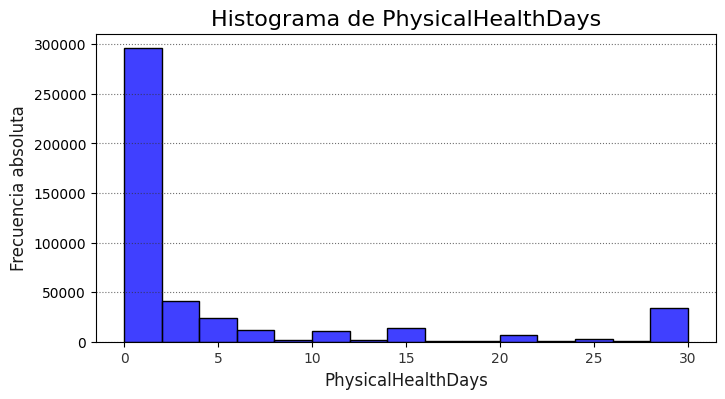

In [1006]:
caracteristica= 'PhysicalHealthDays'
dib_histograma(caracteristica,df,15,hue=None)

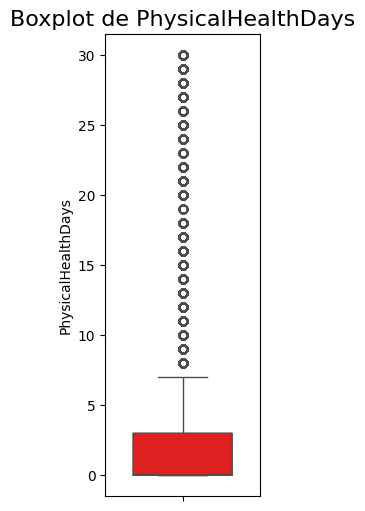

In [1007]:
dib_boxplot(caracteristica,df)

####2.6.1.2 MentalHealthDays

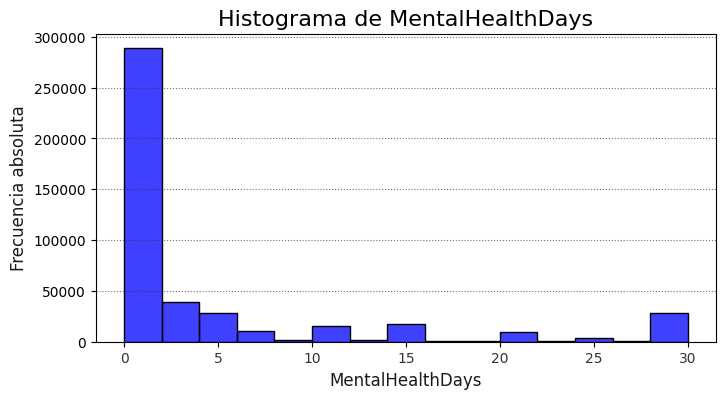

In [1008]:
caracteristica= 'MentalHealthDays'
dib_histograma(caracteristica,df,15,hue=None)

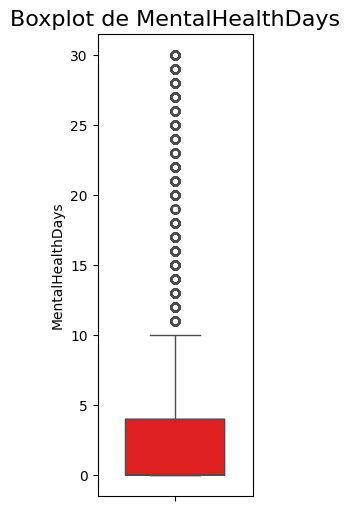

In [1009]:
dib_boxplot(caracteristica,df)

####2.6.1.3 SleepHours

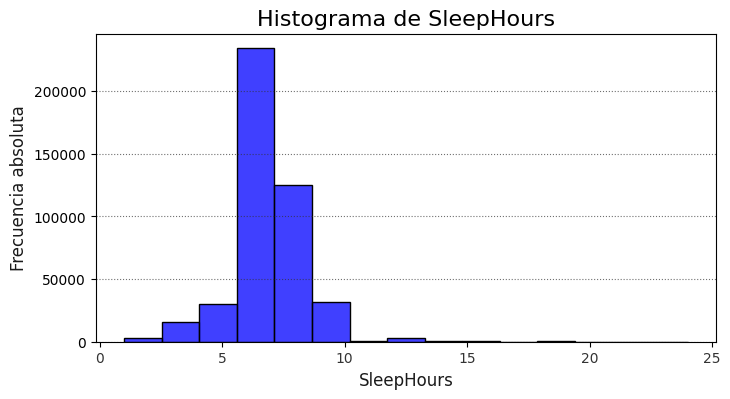

In [1010]:
caracteristica= 'SleepHours'
dib_histograma(caracteristica,df,24,hue=None)

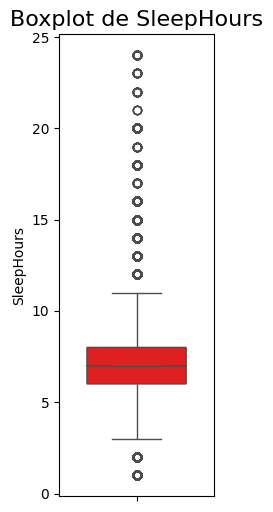

In [1011]:
dib_boxplot(caracteristica,df)

####2.6.1.4 HeightInMeters

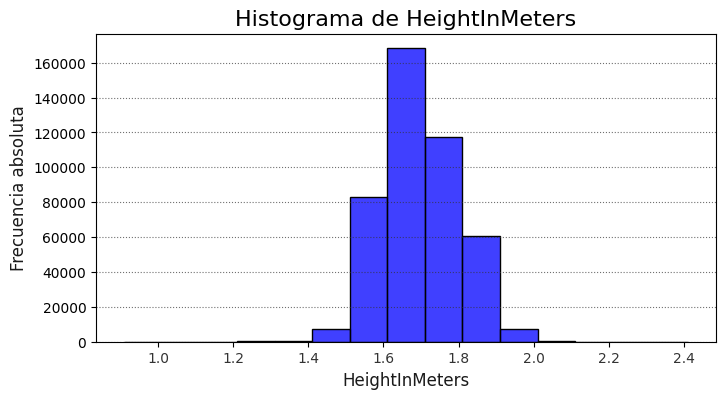

In [1012]:
caracteristica= 'HeightInMeters'
dib_histograma(caracteristica,df,20,hue=None)

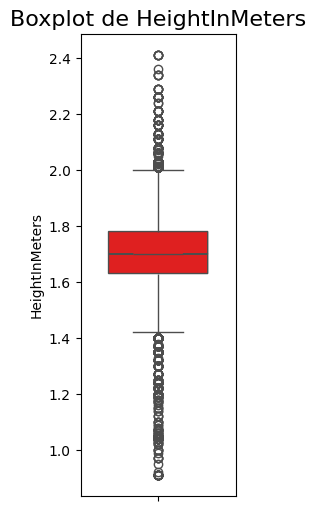

In [1013]:
dib_boxplot(caracteristica,df)

####2.6.1.5 WeightInKilograms

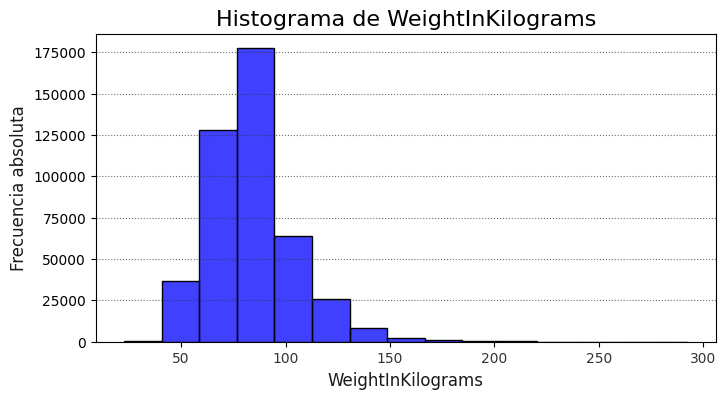

In [1014]:
caracteristica= 'WeightInKilograms'
dib_histograma(caracteristica,df,20,hue=None)

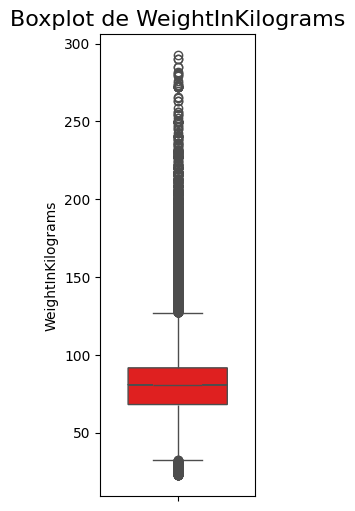

In [1015]:
dib_boxplot(caracteristica,df)

####2.6.1.6 BMI

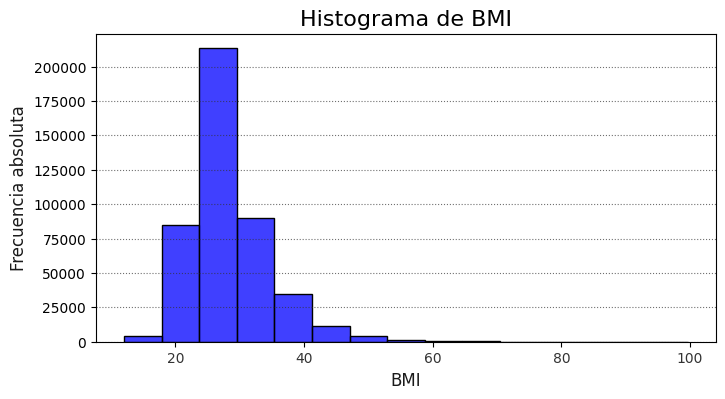

In [1016]:
caracteristica= 'BMI'
dib_histograma(caracteristica,df,20,hue=None)

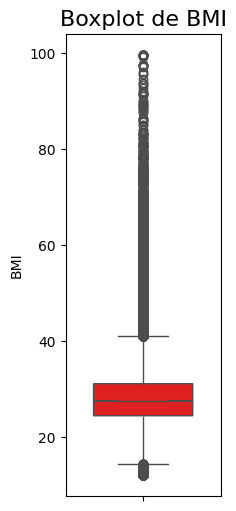

In [1017]:
dib_boxplot(caracteristica,df)

###2.5.2 Características Ordinales

En el caso de las columnas ordinales, se realizan gráficos de barras para visualizar la distribución de cada una de sus categorías:

In [1018]:
columnas_ordinales= ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth',
                     'SmokerStatus', 'ECigaretteUsage', 'AgeCategory']

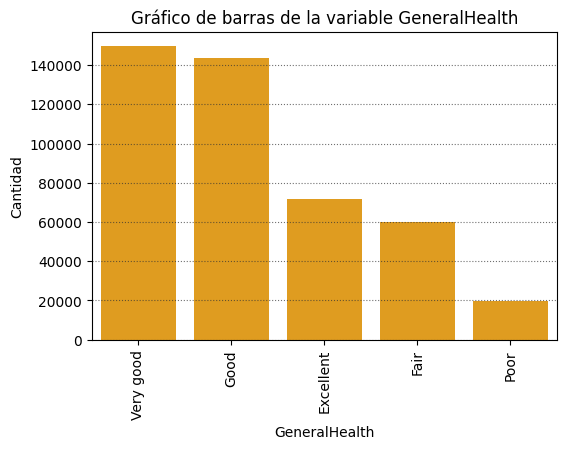

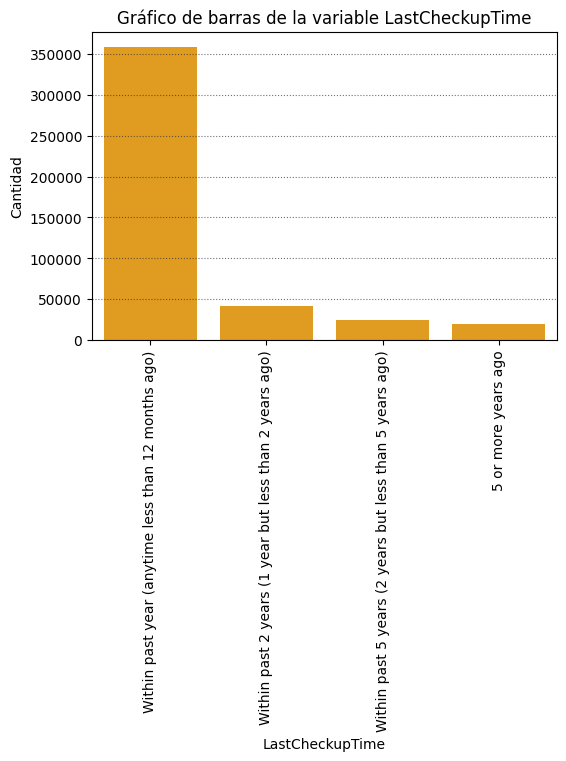

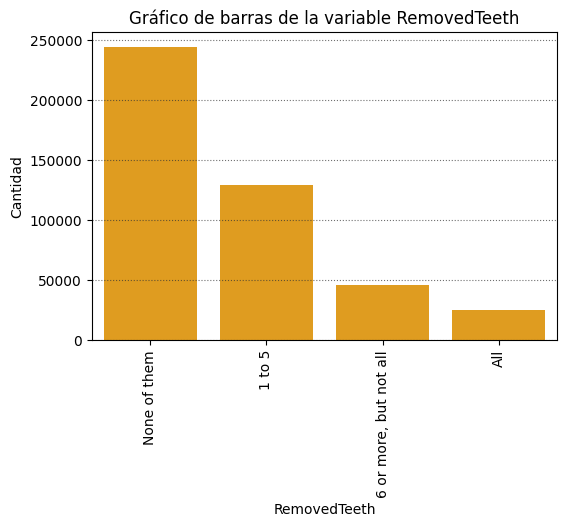

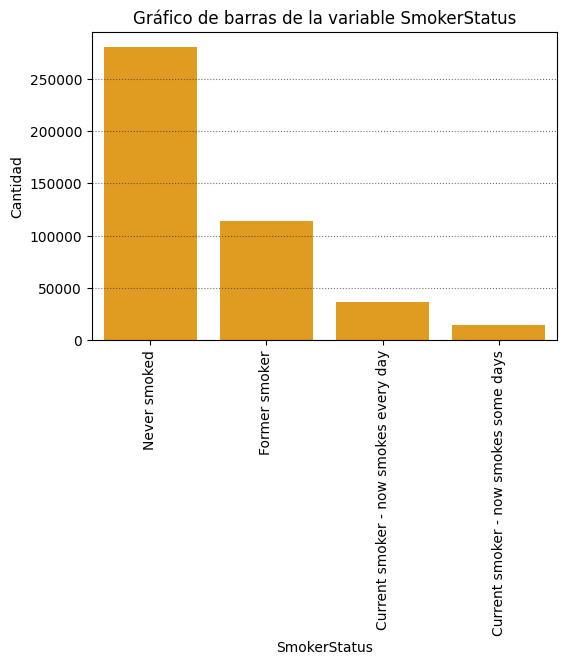

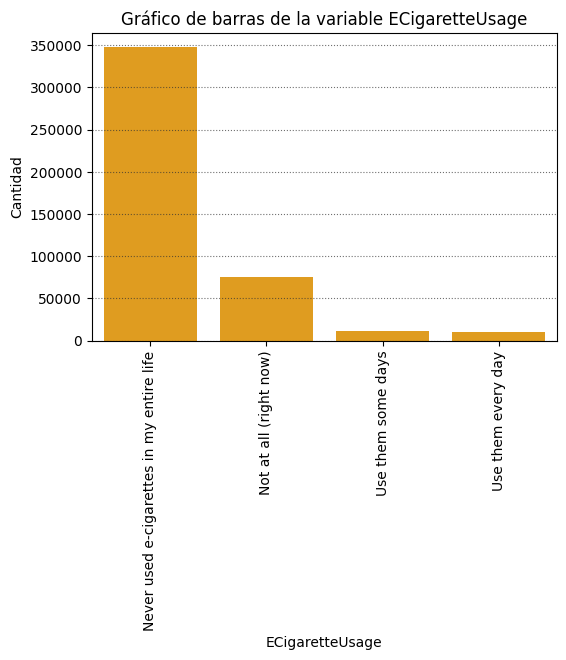

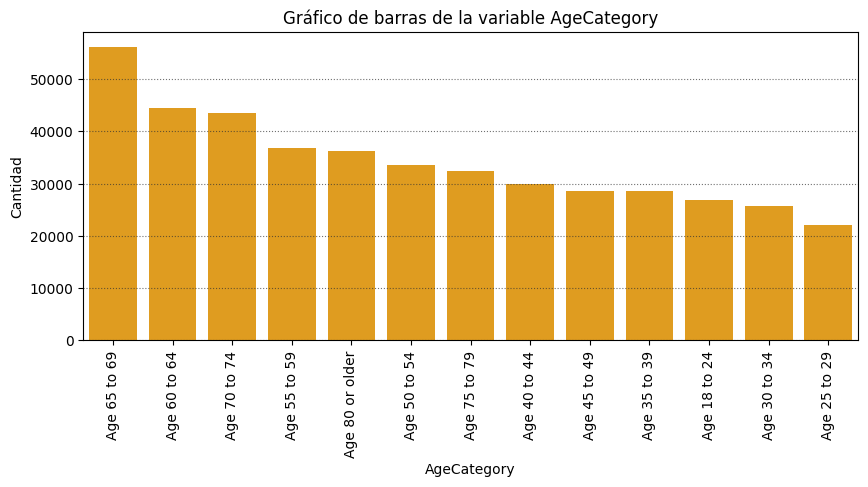

In [1019]:
#Se realiza un gráfico de cada variable categórica ordinal
for columna in columnas_ordinales:
  dib_barplot(columna, df, color='orange')

###2.5.3 Características Nominales


Para el caso de una de las columnas categóricas se procede a realizar gráficos de barras donde se visualiza la frecuencia de cada una de sus categorías

In [1020]:
# Para obtener las columnas nominales y luego graficarlas, en primer lugar
# utilizamos el selector categórico generado previamente. Luego, obteniendo las
# columnas categóricas descontamos las columnas ordinales, lo que dará como
# resultado las columnas tipo nominal:
columnas_nominales= set(selector_cat(df)) - set(columnas_ordinales)

<ipython-input-1005-d64f8c541585>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


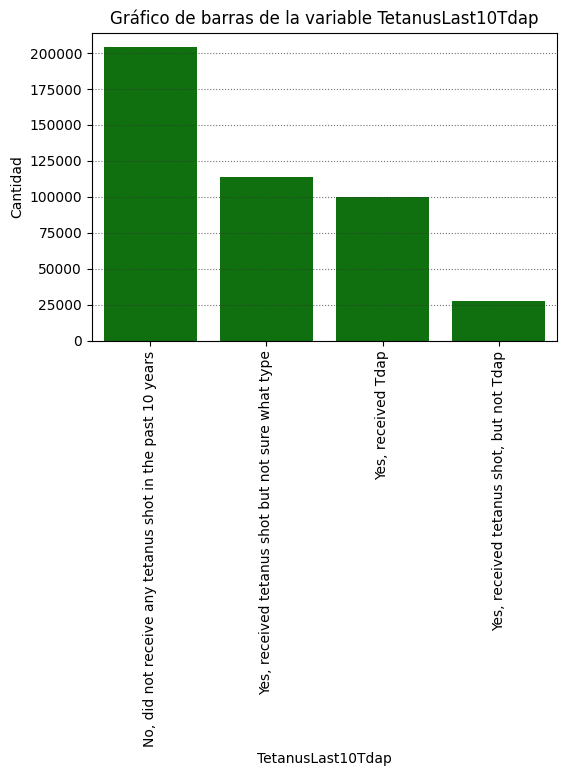

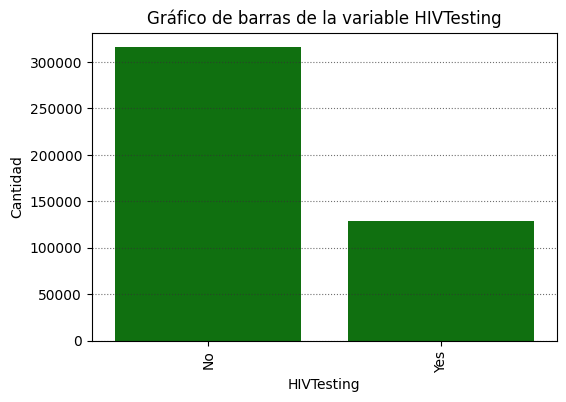

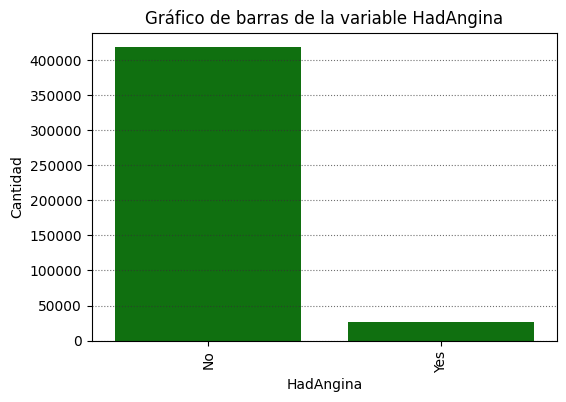

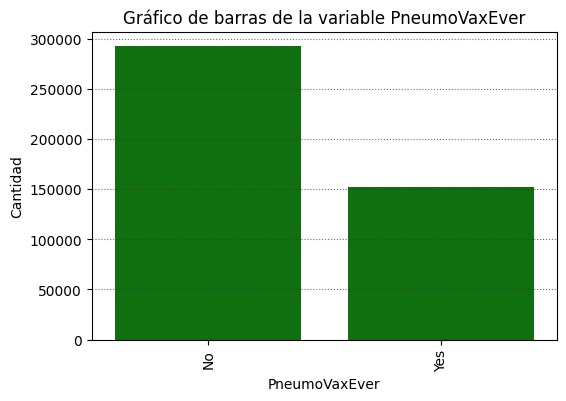

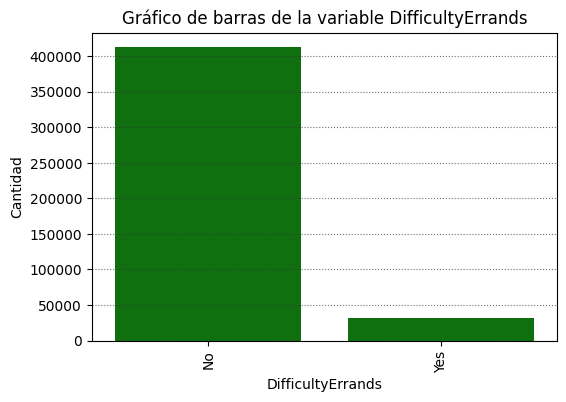

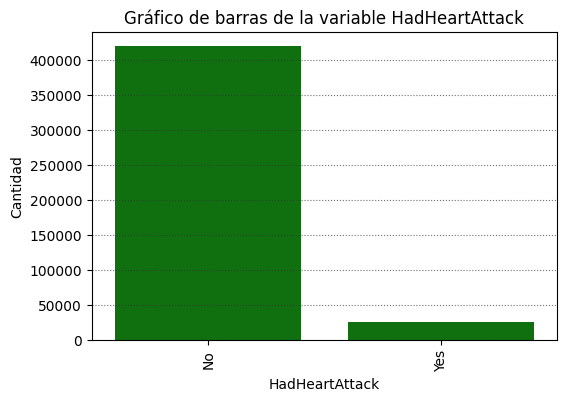

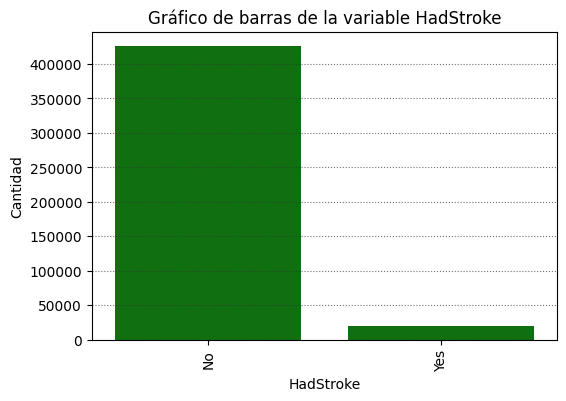

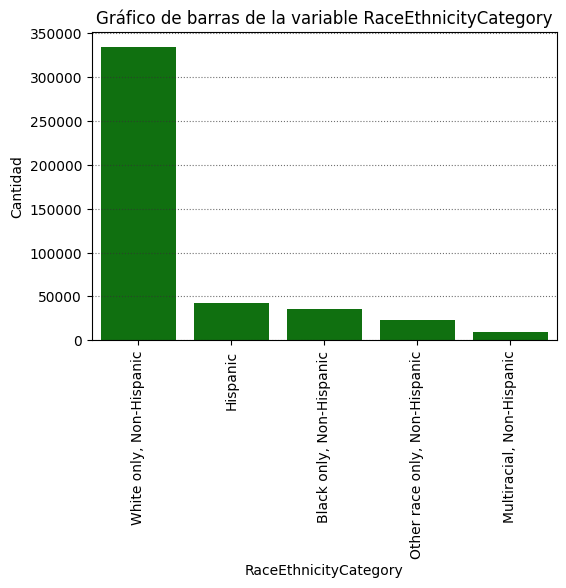

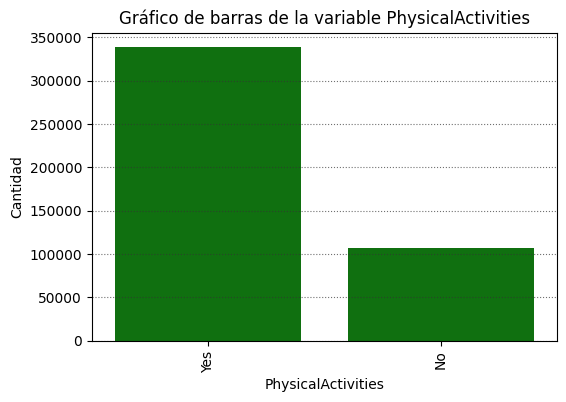

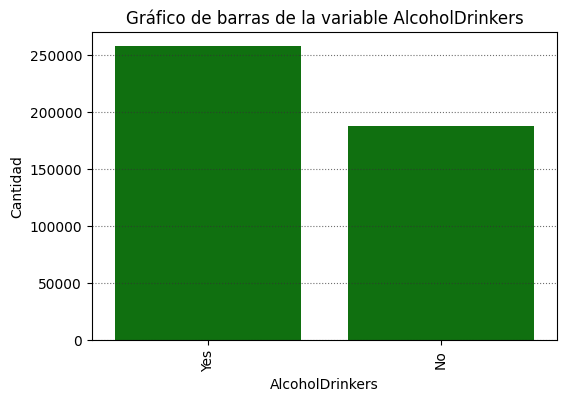

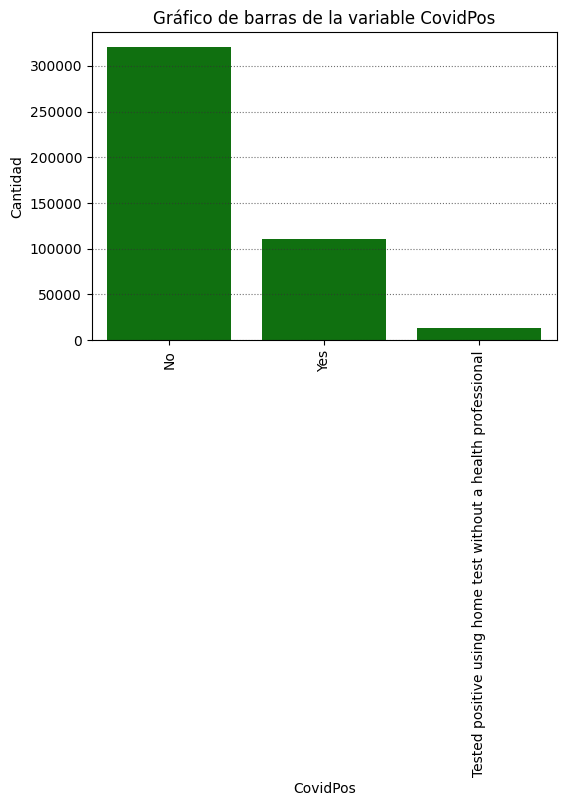

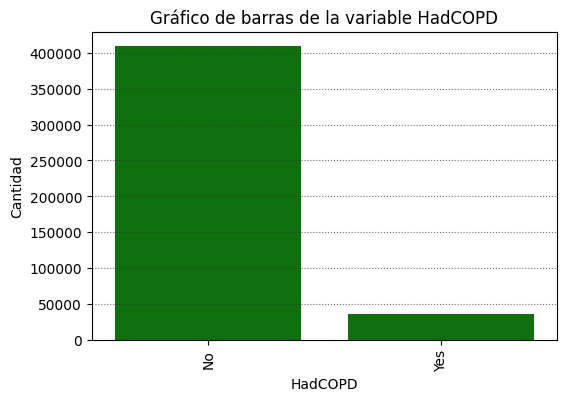

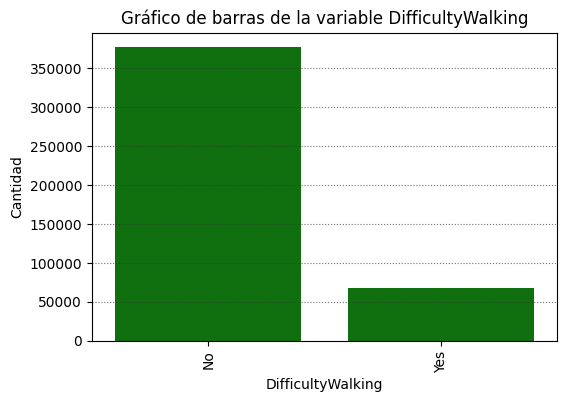

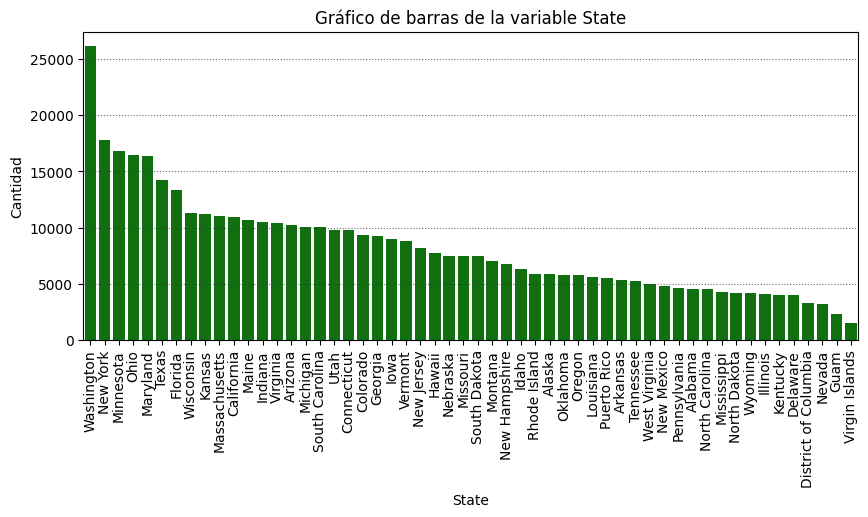

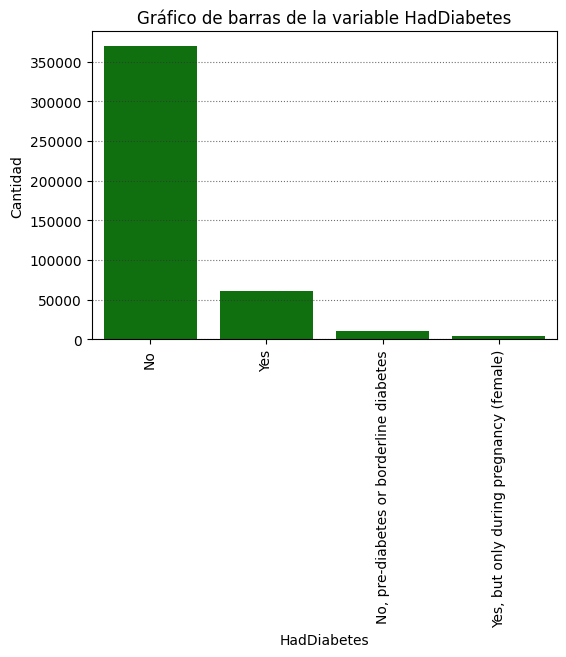

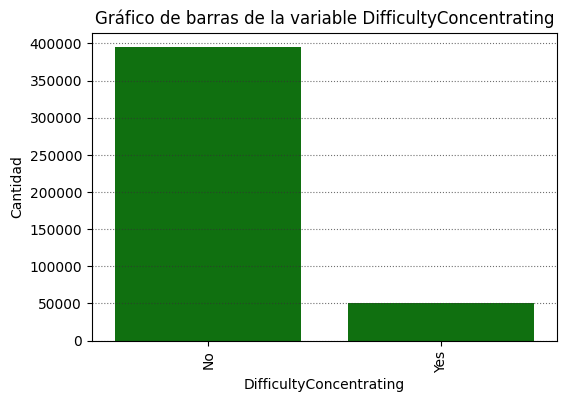

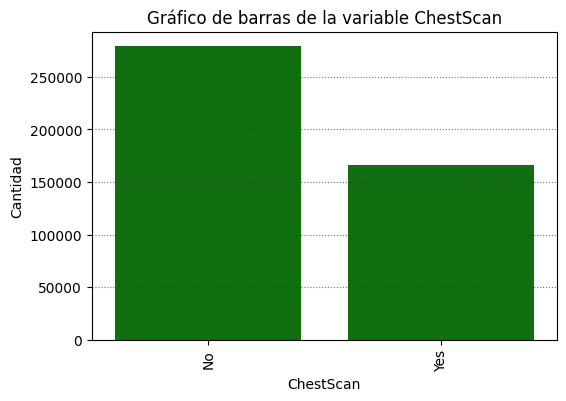

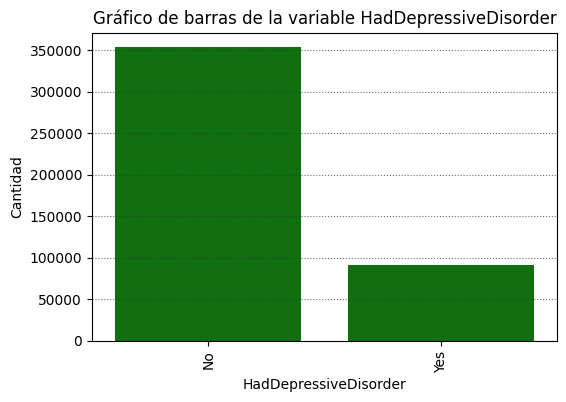

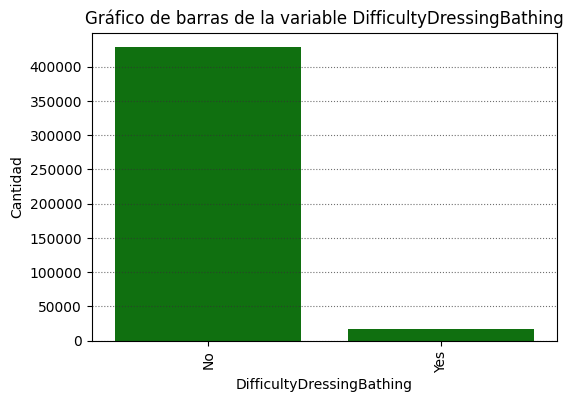

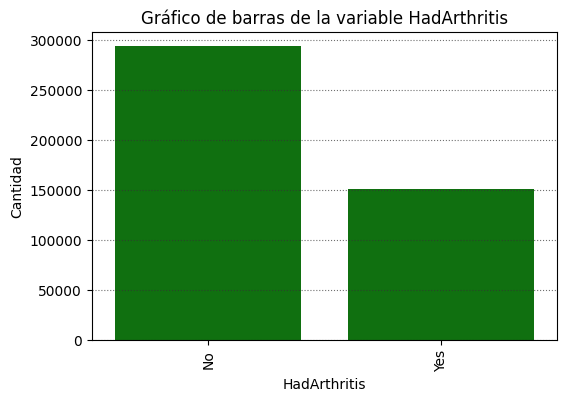

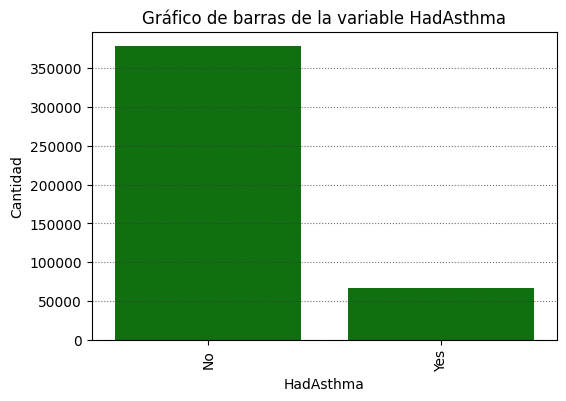

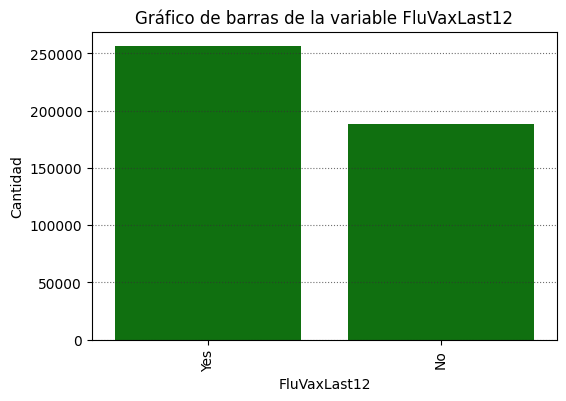

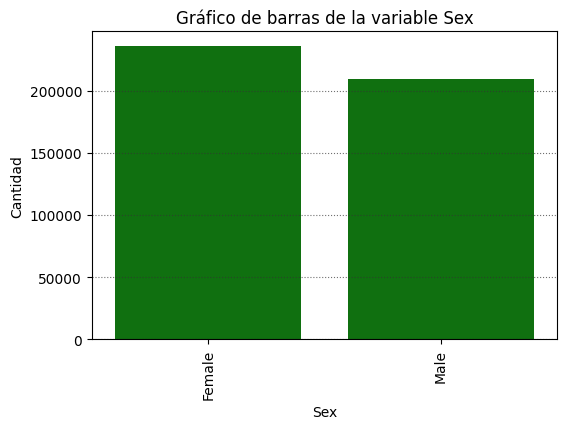

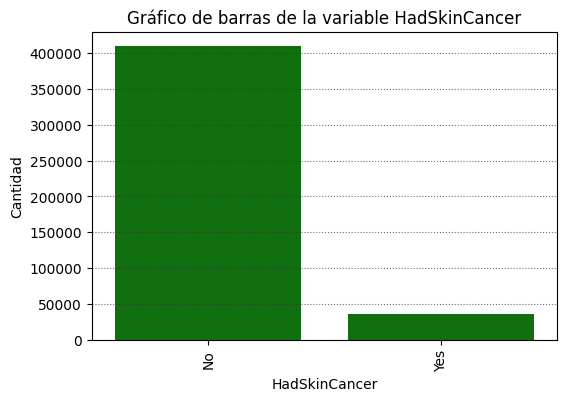

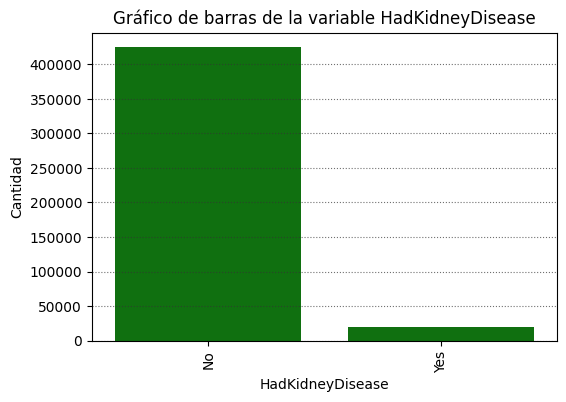

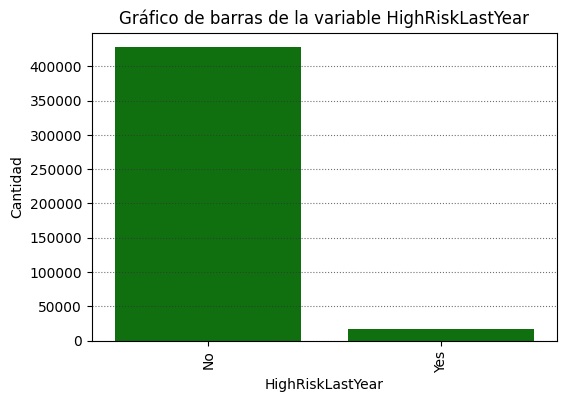

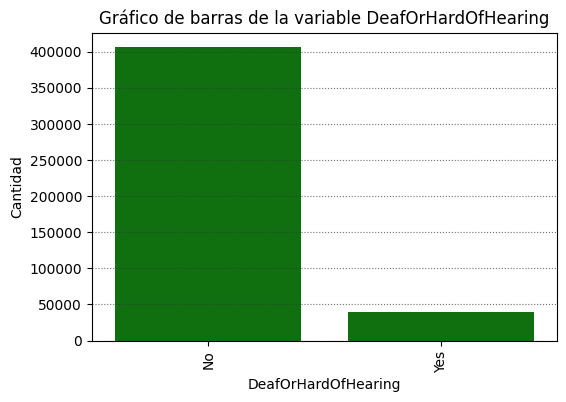

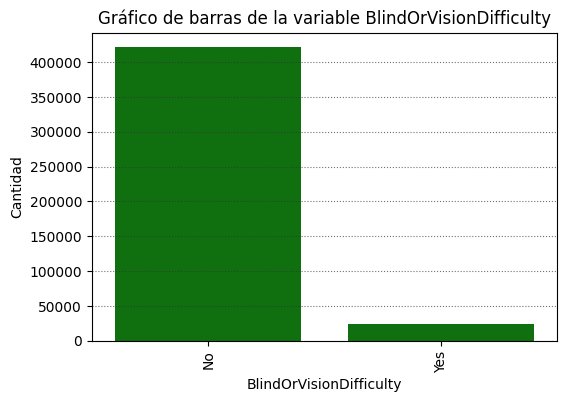

In [1021]:
#Se realiza un gráfico de cada variable categórica nominal
for columna in columnas_nominales:
  dib_barplot(columna, df, color='green')

##2.6 Mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

Para ver la correlación con el target, en primer lugar éste debe ser codificado:

In [1022]:
y= df['HadHeartAttack']
y.value_counts()

HadHeartAttack
No     419867
Yes     25108
Name: count, dtype: int64

In [1023]:
# Codificación variable target
y= y.replace({'No':0, 'Yes':1})

In [1024]:
# Se guardan los cambios en el dataframe
df['HadHeartAttack'] = y

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

<Figure size 600x600 with 0 Axes>

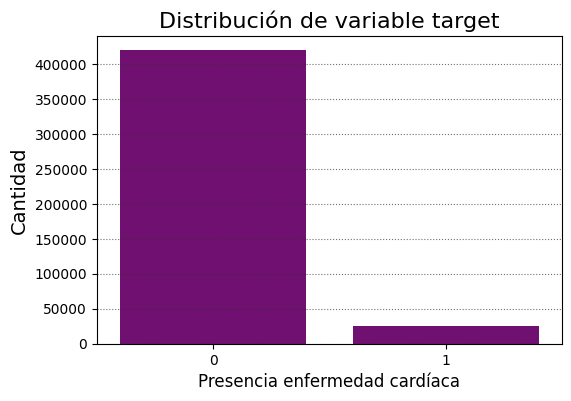

In [1025]:
# Gráfico para ver la distribución del target
plt.figure(figsize=(6,6))
dib_barplot('HadHeartAttack', y, color='purple')
plt.title('Distribución de variable target', fontsize=16)
plt.ylabel('Cantidad', fontsize=14)
plt.xlabel('Presencia enfermedad cardíaca', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

Para determinar las mayores magnitudes de correlación, se grafica el heatmap con las correlaciones en valor absoluto:

In [1026]:
# Obtención de la correlación (Pearson) para analizar la relación lineal
# entre las variables numéricas
correlación= df.corr(numeric_only=True, method='pearson')

Text(0.5, 1.0, 'Correlación - Pearson')

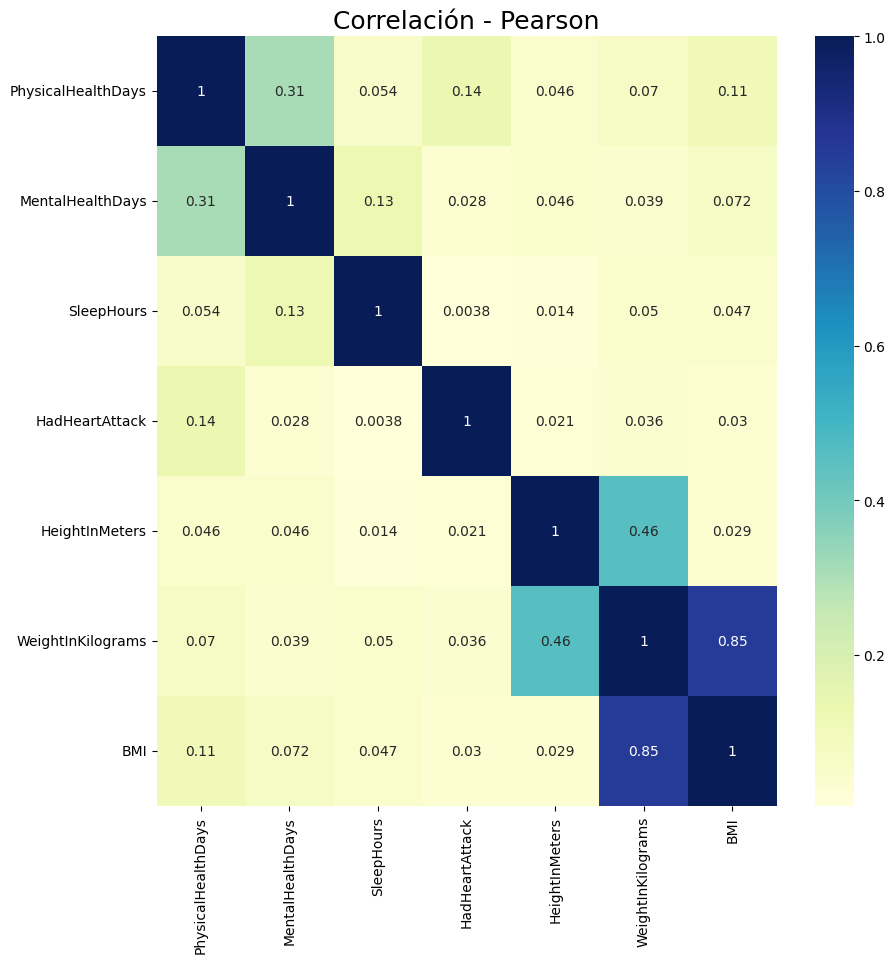

In [1027]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(correlación), annot=True, cmap='YlGnBu')
plt.title('Correlación - Pearson', fontsize=18)

Text(0.5, 1.0, 'Correlación - Kendall')

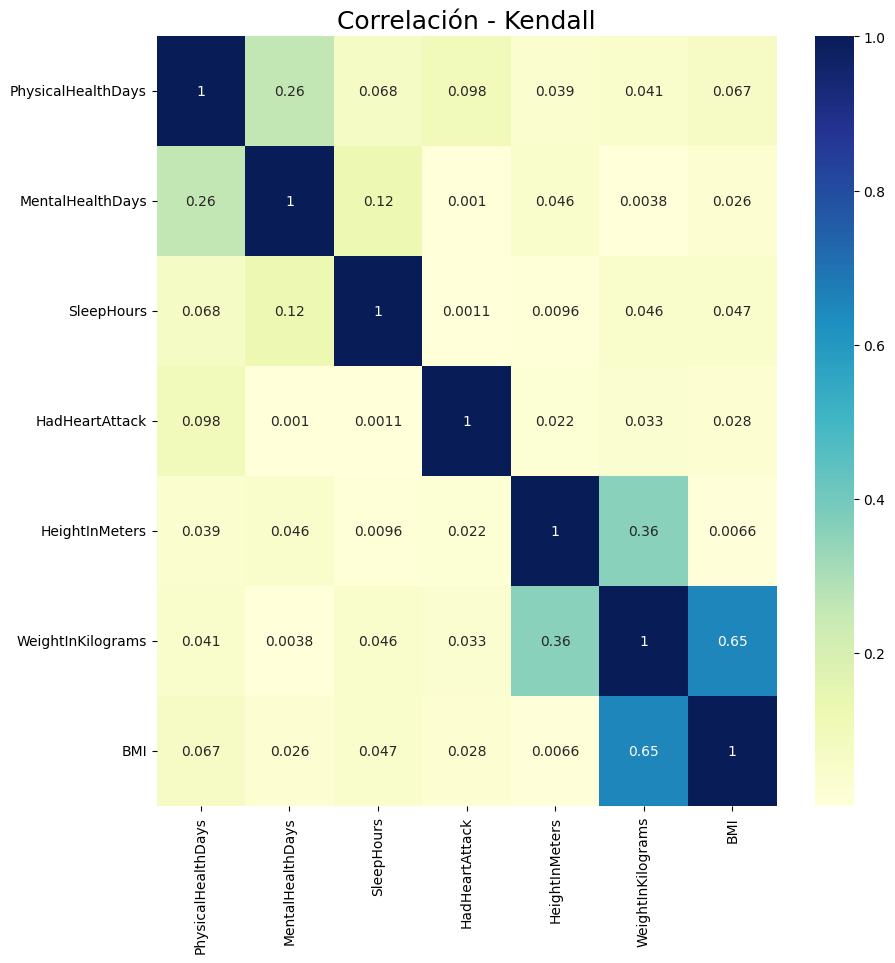

In [1028]:
# Obtención de la correlación (Kendall) para analizar la relación entre
# las variables numéricas y el target
correlación= df.corr(numeric_only=True, method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(abs(correlación), annot=True, cmap='YlGnBu')
plt.title('Correlación - Kendall', fontsize=18)

- Las columnas que tienen las mayores correlaciones son GeneralHealth, AgeCategory, RemovedTeeth y PhysicalHealthDays. Las correlaciones (Pearson) en estas columnas van desdel 0.14 a 0.19

- La correlación (Pearson) más alta en los datos se produce entre las columnas WeightInKilograms y BMI, donde el valor llega a 0.86

- Correlaciones moderadas (Person) se dan entre PhysicalHealthDays y GeneralHealth (correlación igual a 0.5) y entre las columnas HeightInMeters con WeightInKilogram (correlación de 0.47)

- En término generales, el target no tiene correlaciones altas con el resto de las variables. De todas ellas, el target tiene la correlación (Kendall) más alta con la variable PhysicalHealthDays (valor de 0.098)

##2.7 Gráficos de barras multivariantes

In [1029]:
# Referencia: https://www.statology.org/seaborn-barplot-order/

def graficar_barras(variableX, variableY, df, hue=None,
                    order=None, hue_order=None):

  plt.style.use('tableau-colorblind10')

  # Si el gráfico es multivariado ('hue' no es igual a None), se cambia el tamaño de la figura
  # if hue == None:
  #   plt.figure(figsize=(8,4), facecolor='white')
  # else:
  #   plt.figure(figsize=(8,4), facecolor='white')

  # Se guarda el axe en caso de necesitar leyenda y moverlo
  ax =sns.barplot(data=df, x=variableX, y=variableY,
                  hue=hue, order= order, hue_order=hue_order, saturation=1)

  # Título del gráfico
  titulo = f'Ventas totales agrupadas por {hue}'
  plt.title(titulo, fontsize=16)

  # Etiquetas de los ejes
  plt.xticks(c=(0.2,0.2,0.2))
  plt.xticks(c=(0.2,0.2,0.2))

  # Cuadricula
  plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

  # Títulos de los ejes
  plt.xlabel(variableX, fontsize=12, c=(0.1,0.1,0.1))
  plt.ylabel(variableY, fontsize=12, c=(0.1,0.1,0.1))

  # Comando para agregar leyenda
  # https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
  # plt.legend(title='Tipo de Outlet')

  # Graficar leyenda si es que el parámetro 'hue' es distinto de None
  # Referencia : https://seaborn.pydata.org/generated/seaborn.move_legend.html
  if hue != None:
    sns.move_legend(ax, loc=(1.01, 0.5))

###2.7.1 Agrupación por fumadores y sexo

In [1030]:
# Incidencia enfermedades cardíacas según tipo de fumadores
#df.groupby(['SmokerStatus'])[['HadHeartAttack']].sum()*100/df.groupby(['SmokerStatus'])[['HadHeartAttack']].count()
df.groupby(['SmokerStatus'])[['HadHeartAttack']].mean()*100


,HadHeartAttack
SmokerStatus,
Current smoker - now smokes every day,8.827042
Current smoker - now smokes some days,7.016789
Former smoker,8.581424
Never smoked,3.978099


In [1031]:
#agrupacion_smoker_sex= df.groupby(['SmokerStatus','Sex'])[['HadHeartAttack']].sum()*100 / df.groupby(['SmokerStatus','Sex'])[['HadHeartAttack']].count()
agrupacion_smoker_sex = df.groupby(['SmokerStatus', 'Sex'])[['HadHeartAttack']].mean()*100


In [1032]:
agrupacion_smoker_sex

HadHeartAttack
SmokerStatus                          Sex                   
Current smoker - now smokes every day Female        6.885300
                                      Male         10.786228
Current smoker - now smokes some days Female        6.098682
                                      Male          7.825148
Former smoker                         Female        5.726401
                                      Male         11.182785
Never smoked                          Female        3.148272
                                      Male          5.026149

In [1033]:
grupo_fumadores = ['Never smoked','Current smoker - now smokes some days',
                   'Current smoker - now smokes every day','Former smoker' ]

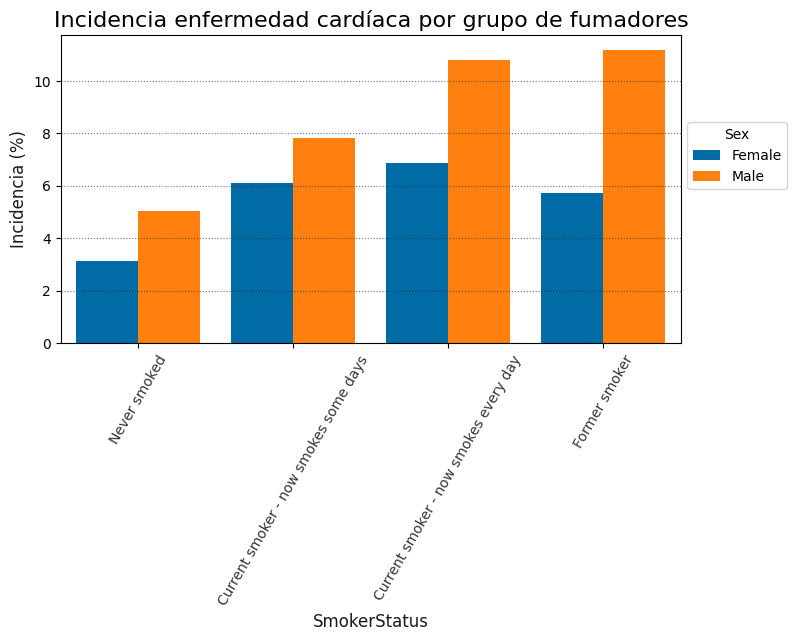

In [1034]:
plt.figure(figsize=(8,4))
graficar_barras('SmokerStatus','HadHeartAttack',
                agrupacion_smoker_sex,
                hue='Sex',
                order=grupo_fumadores)
plt.title('Incidencia enfermedad cardíaca por grupo de fumadores', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)

plt.savefig('IncidenciaFumadores.png')

Como se aprecia en la figura anterior, el nivel de cigarrillos fumados por una persona está relacionado con la indicendia de enfermedades cardíacas. Se aprecia que incluso una persona que ha fumado al menos 100 cigarrillos pero que había dejado de fumar al momento de la encuesta (Former smoker) tiene una incidencia alrededor de un 100% superior tanto en mujeres como en hombres respecto a una persona que no ha fumado en su vida.

###2.7.2 Agrupación por dientes removidos y sexo

In [1035]:
#agrupacion_removedteeth_sex = df.groupby(['RemovedTeeth','Sex'])[['HadHeartAttack']].sum()*100 / df.groupby(['RemovedTeeth','Sex'])[['HadHeartAttack']].count()
agrupacion_removedteeth_sex = df.groupby(['RemovedTeeth','Sex'])[['HadHeartAttack']].mean()*100
# agrupacion_removedteeth_sex

In [1036]:
grupo_removed=['None of them', '1 to 5', '6 or more, but not all', 'All']

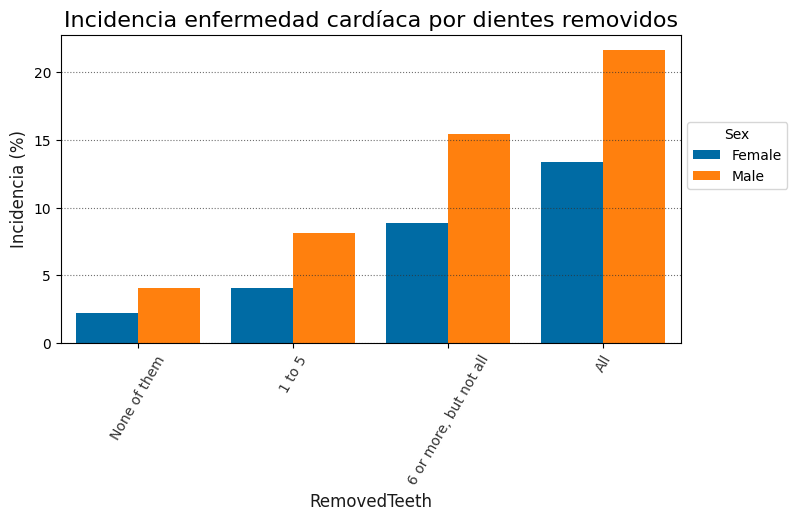

In [1037]:
plt.figure(figsize=(8,4))
graficar_barras('RemovedTeeth','HadHeartAttack', agrupacion_removedteeth_sex, 'Sex', order=grupo_removed)
plt.title('Incidencia enfermedad cardíaca por dientes removidos', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)
#plt.tight_layout()
plt.savefig('IncidenciaDientes.png')

De la tabla previa se observa que cuanto mayor es la cantidad de dientes removidos, mayor es la incidencia de enfermedad cardíaca. La observación se realiza tanto para mujeres como hombres

###2.7.3 Agrupación por AgeCategory y sexo

In [1038]:
agrupacion_age_sex= df.groupby(['AgeCategory','Sex'])[['HadHeartAttack']].sum()*100/df.groupby(['AgeCategory','Sex'])[['HadHeartAttack']].count()
# agrupacion_age_sex

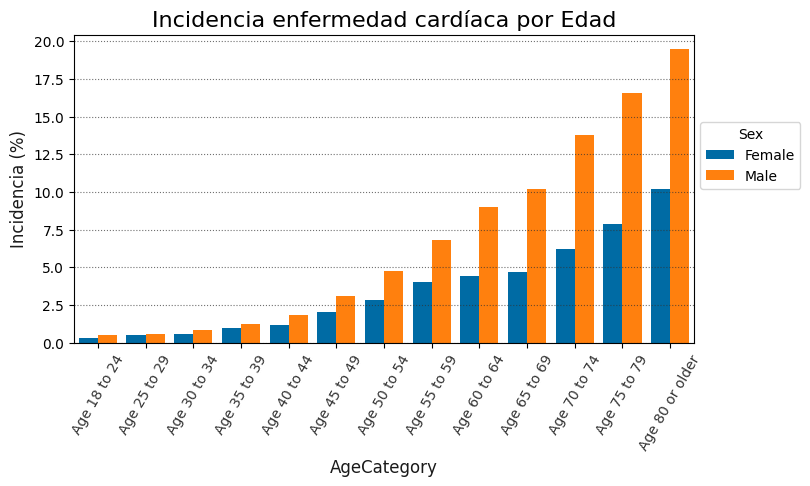

In [1039]:
plt.figure(figsize=(8,4))
graficar_barras('AgeCategory','HadHeartAttack', agrupacion_age_sex, 'Sex')
plt.title('Incidencia enfermedad cardíaca por Edad', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)
#plt.tight_layout()
plt.savefig('IncidenciaEdadSexo.png')

Sobre la edad, se aprecia que a medida que la población va envejeciendo va aumentado el riesgo de sufrir enfermedades cardíacas

###2.7.4 Agrupación por AgeCategory y RemovedTeeth

In [1040]:
agrupacion_age_removed= df.groupby(['AgeCategory','RemovedTeeth'])[['HadHeartAttack']].sum()*100/df.groupby(['AgeCategory','RemovedTeeth'])[['HadHeartAttack']].count()
# agrupacion_age_removed

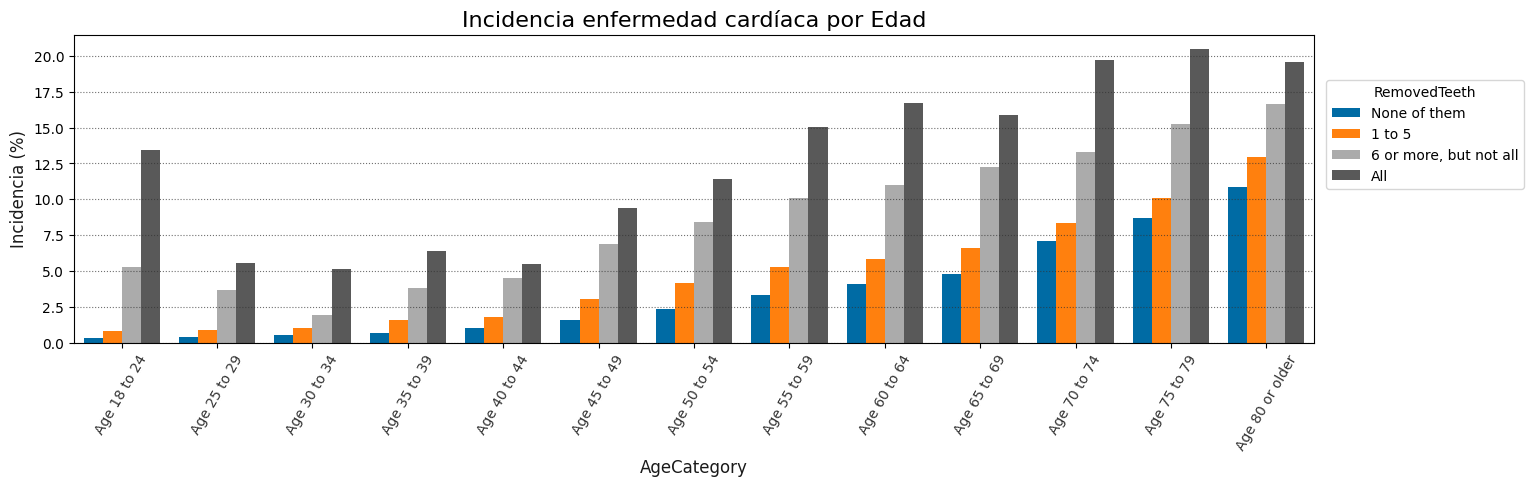

In [1041]:
plt.figure(figsize=(16,4))
graficar_barras('AgeCategory','HadHeartAttack', agrupacion_age_removed, 'RemovedTeeth', hue_order=grupo_removed)
plt.title('Incidencia enfermedad cardíaca por Edad', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)
#plt.tight_layout()
plt.savefig('IncidenciaEdadRemoved.png')

Este gráfico es una combinación de los 2 gráficos anteriores (piezas dentales removidas y edad). A primera vista podría parecer que no se aporta mayor información, toda vez que ya que se han graficado las incidencias de ambas variables.

En un principio, es conocida la relación entre edad y enfermedades cardíacas. No así, la relación entre dientes removidos y la prevalencia de enfermedades al corazón. De hecho, se podría argumentar que las personas a medida que van envejeciendo van perdiendo sus piezas dentales y sería este efecto (la edad) la que explicaría la mayor cantidad de piezas dentales removidas y el aumento del riesgo de enfermedades cardíacas.

Si bien no se puede asegurar una causalidad (sí una relación), al agrupar las incidencias por edad y dientes removidos se puede ver claramente que independiente del grupo etario, siempre una mayor cantidad de piezas dentales removidas conlleva una mayor incidencia de enfermedades cardíacas. Con esta visualización se observa que los dientes removidos es una variable que, independiente de la edad, también está relacionada al riesgo de padecer una enfermedad cardíaca.

#3 Preprocesamiento de Datos

En primer lugar, se vuelven a cargar los datos para tener un dataset en bruto y se separan las características del target

In [1042]:
filename = '/content/drive/MyDrive/Projects/Heart Disease/heart_2022_with_nans.csv'
df = pd.read_csv(filename)

In [1043]:
y= df['HadHeartAttack']
X= df.drop('HadHeartAttack', axis=1)

##3.1 Tratamiento columna Target

Se eliminan los registros donde el target es valor nulo

In [1044]:
X= X[y.notna()]

In [1045]:
y= y[y.notna()]

Ahora, se codifica numéricamente la variable objetivo:

In [1046]:
y= y.replace({'No':0, 'Yes':1})

##3.2 Tratamiento columnas de caracterísicas

Se aplicarán distintos tipos técnicas para el preprocesamiento de datos. La finalidad de este enfoque es evaluar el impacto de dichas técnicas en las predicciones y utilizar aquellas que ofrezca un mejor rendimiento en los modelos con sus parámetros por defecto. Las combinaciones posibles y sus numeraciones, serán las siguientes:

- **X1, y1:** Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers y sin escalamiento

- **X2, y2:** Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers, con escalamiento

- **X3, y3:** Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers, sin escalamiento

- **X4, y4:** Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers y con escalamiento

- **X5, y5:** Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers y sin escalamiento

- **X6, y6:** Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers, con escalamiento

- **X7, y7:** Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers, sin escalamiento

- **X8, y8:** Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers y con escalamiento



###3.2.1 Diccionario de datos de columnas ordinales




Se establecen los diccionarios de datos cuando las columnas son ordinales

In [1047]:
columnas_ordinales= ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory']

In [1048]:
dicc_gh = {'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}

In [1049]:
dicc_lct= {'Within past year (anytime less than 12 months ago)':0,
           'Within past 2 years (1 year but less than 2 years ago)':1,
           'Within past 5 years (2 years but less than 5 years ago)':2,
           '5 or more years ago':3}

In [1050]:
dicc_rt= {'None of them':0, '1 to 5':1, '6 or more, but not all':2, 'All':3}

In [1051]:
dicc_ss= {'Never smoked':0, 'Former smoker':1, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3  }

In [1052]:
dicc_ecu= {'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':1, 'Use them some days':2, 'Use them every day':3}

In [1053]:
dicc_ac= {'Age 18 to 24': 0,
          'Age 25 to 29': 1,
          'Age 30 to 34': 2,
          'Age 35 to 39': 3,
          'Age 40 to 44': 4,
          'Age 45 to 49': 5,
          'Age 50 to 54': 6,
          'Age 55 to 59': 7,
          'Age 60 to 64': 8,
          'Age 65 to 69': 9,
          'Age 70 to 74': 10,
          'Age 75 to 79': 11,
          'Age 80 or older': 12}

###3.2.2 Pipelines

Se generan selectores de columnas

In [1054]:
# Se crean selectores de columnas para controlar los flujos de datos en
# los pipelines
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [1055]:
col_num = make_column_selector(dtype_include='number')
col_cat = make_column_selector(dtype_include='object')

Creación de preprocesadores para datos numéricos y categóricos (nominales)

In [1056]:
# Imputación del valor más frecuente en el caso de variables categóricas
ohe= OneHotEncoder(handle_unknown='ignore')
imputer_cat= SimpleImputer(strategy='most_frequent')

In [1057]:
# Imputación de la mediana en el caso de variables numéricas
scaler= StandardScaler()
imputer_num= SimpleImputer(strategy='median')

Se establecen los pipelines para datos numéricos y categóricos

In [1058]:
# Pipeline para datos categóricos
pipeline_cat = make_pipeline(imputer_cat, ohe)

In [1059]:
# Pipelina para datos numéricos
pipeline_num= make_pipeline(imputer_num, scaler)

###3.2.3 Manejo de outliers
En cada columna que se aplique las siguientes funciones, los outliers por fuera de los bigotes de su respectivo boxplot serán recortados a los mínimos y máximos establecidos por Tukey

Manejo de outliers en datos de entrenamiento

In [1060]:
def tratamiento_outliers_train(columna_original):
  # Se crea una copia de la columna para evitar SettingWithCopyWarning
  # Referencia: https://saturncloud.io/blog/pandas-warning-when-using-map-a-value-is-trying-to-be-set-on-a-copy-of-a-slice-from-a-dataframe/
  columna = columna_original.copy()

  q_75= columna.quantile(0.75)
  q_25= columna.quantile(0.25)
  IQR= q_75 - q_25
  minimo= q_25 - 1.5*IQR
  maximo= q_75 + 1.5*IQR
  columna.loc[columna > maximo]= maximo
  columna.loc[columna < minimo]= minimo
  return columna

Manejo de outliers en datos de prueba

In [1061]:
def tratamiento_outliers_test(datos_train, datos_test_original):
  minimo= datos_train.min()
  maximo= datos_train.max()

  # Se crea una copia de la columna para evitar SettingWithCopyWarning
  # Referencia: https://saturncloud.io/blog/pandas-warning-when-using-map-a-value-is-trying-to-be-set-on-a-copy-of-a-slice-from-a-dataframe/
  datos_test=datos_test_original.copy()

  datos_test.loc[datos_test > maximo]= maximo
  datos_test.loc[datos_test < minimo]= minimo
  return datos_test

###3.2.4 División train-test

In [1062]:
from sklearn.model_selection import train_test_split

In [1063]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1064]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1065]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1066]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1067]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [1068]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [1069]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [1070]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X,y,test_size=0.2, random_state=42)


##3.3 Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers y sin escalamiento

###3.3.1 Eliminación registros con valores faltantes en datos de entrenamiento

In [1071]:
# Total de filas que tienen al menos un valor nulo
X1_train.isnull().any(axis=1).sum()

156737

In [1072]:
# Filas que tengan al menos 1 valor nulo
filtro_na_train= X1_train.isna().any(axis=1)
filtro_na_test= X1_test.isna().any(axis=1)

In [1073]:
X1_train= X1_train[~filtro_na_train]
y1_train= y1_train[~filtro_na_train]

In [1074]:
# Se verifica que no queden filas con al menos 1 valor nulo
X1_train.isnull().any(axis=1).sum()

0

**Dado que el tratamiento efectuado es común en los puntos 3.4, 3.5, 3.6 y 3.7, se realizan copias que son reutilizadas posteriormente:**

In [1075]:
X2_train, y2_train = X1_train.copy(), y1_train.copy()

In [1076]:
X3_train, y3_train = X1_train.copy(), y1_train.copy()

In [1077]:
X4_train, y4_train = X1_train.copy(), y1_train.copy()

###3.3.2 Eliminación registros con valores faltantes en datos de prueba

In [1078]:
# Total de filas que tienen al menos un valor nulo
X1_test.isnull().any(axis=1).sum()

39308

In [1079]:
X1_test= X1_test[~filtro_na_test]
y1_test= y1_test[~filtro_na_test]

In [1080]:
# Se verifica que no queden filas con al menos 1 valor nulo
X1_test.isnull().any(axis=1).sum()

0

**Dado que el tratamiento efectuado es común en los puntos 3.4, 3.5, 3.6 y 3.7, se realizan copias que son reutilizadas posteriormente:**

In [1081]:
X2_test, y2_test =  X1_test.copy(), y1_test.copy()

In [1082]:
X3_test, y3_test =  X1_test.copy(), y1_test.copy()

In [1083]:
X4_test, y4_test =  X1_test.copy(), y1_test.copy()

###3.3.3 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1084]:
X1_train['GeneralHealth']= X1_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X1_train['LastCheckupTime']= X1_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X1_train['RemovedTeeth']= X1_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X1_train['SmokerStatus']= X1_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X1_train['ECigaretteUsage']= X1_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X1_train['AgeCategory']= X1_train['AgeCategory'].replace(dicc_ac).astype('float64')

Aplicación del pipeline

In [1085]:
pipeline_ohe= make_column_transformer((ohe, col_cat), remainder='passthrough')

In [1086]:
pipeline_ohe.fit(X1_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>)])

In [1087]:
X1_train= pipeline_ohe.transform(X1_train)

In [1088]:
# Se asignan los nuevos nombres al dataframe
X1_train = pd.DataFrame(data=X1_train, columns=pipeline_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X1_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X1_train.columns]

###3.3.4 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1089]:
X1_test['GeneralHealth']= X1_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X1_test['LastCheckupTime']= X1_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X1_test['RemovedTeeth']= X1_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X1_test['SmokerStatus']= X1_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X1_test['ECigaretteUsage']= X1_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X1_test['AgeCategory']= X1_test['AgeCategory'].replace(dicc_ac).astype('float64')

Aplicación del pipeline

In [1090]:
X1_test= pipeline_ohe.transform(X1_test)

In [1091]:
# Se asignan los nuevos nombres al dataframe
X1_test = pd.DataFrame(data=X1_test, columns=pipeline_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X1_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X1_test.columns]

##3.4 Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers, con escalamiento

###3.4.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1092]:
X2_train['GeneralHealth']= X2_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X2_train['LastCheckupTime']= X2_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X2_train['RemovedTeeth']= X2_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X2_train['SmokerStatus']= X2_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X2_train['ECigaretteUsage']= X2_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X2_train['AgeCategory']= X2_train['AgeCategory'].replace(dicc_ac).astype('float64')

Aplicación del pipeline

In [1093]:
pipeline_ohe_scaler= make_column_transformer((ohe, col_cat), (scaler, col_num), remainder='passthrough')

In [1094]:
pipeline_ohe_scaler.fit(X2_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e279cf0c5e0>)])

In [1095]:
X2_train= pipeline_ohe_scaler.transform(X2_train)

In [1096]:
# Se asignan los nuevos nombres al dataframe
X2_train = pd.DataFrame(data=X2_train, columns=pipeline_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X2_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X2_train.columns]

###3.4.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1097]:
X2_test['GeneralHealth']= X2_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X2_test['LastCheckupTime']= X2_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X2_test['RemovedTeeth']= X2_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X2_test['SmokerStatus']= X2_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X2_test['ECigaretteUsage']= X2_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X2_test['AgeCategory']= X2_test['AgeCategory'].replace(dicc_ac).astype('float64')

Aplicación del pipeline

In [1098]:
X2_test= pipeline_ohe_scaler.transform(X2_test)

In [1099]:
# Se asignan los nuevos nombres al dataframe
X2_test = pd.DataFrame(data=X2_test, columns=pipeline_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X2_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X2_test.columns]

##3.5 Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers, sin escalamiento

###3.5.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1100]:
X3_train['GeneralHealth']= X3_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X3_train['LastCheckupTime']= X3_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X3_train['RemovedTeeth']= X3_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X3_train['SmokerStatus']= X3_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X3_train['ECigaretteUsage']= X3_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X3_train['AgeCategory']= X3_train['AgeCategory'].replace(dicc_ac).astype('float64')

In [1101]:
X3_train['HeightInMeters']= tratamiento_outliers_train(X3_train['HeightInMeters'])

In [1102]:
X3_train['WeightInKilograms']= tratamiento_outliers_train(X3_train['WeightInKilograms'])

In [1103]:
X3_train['BMI']= tratamiento_outliers_train(X3_train['BMI'])

Aplición del pipeline

In [1104]:
pipeline_ohe= make_column_transformer((ohe, col_cat), remainder='passthrough')

In [1105]:
pipeline_ohe.fit(X3_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>)])

In [1106]:
X3_train= pipeline_ohe.transform(X3_train)

In [1107]:
# Se asignan los nuevos nombres al dataframe
X3_train = pd.DataFrame(data=X3_train, columns=pipeline_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X3_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X3_train.columns]

###3.5.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1108]:
X3_test['GeneralHealth']= X3_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X3_test['LastCheckupTime']= X3_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X3_test['RemovedTeeth']= X3_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X3_test['SmokerStatus']= X3_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X3_test['ECigaretteUsage']= X3_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X3_test['AgeCategory']= X3_test['AgeCategory'].replace(dicc_ac).astype('float64')

Tratamiento de outliers

In [1109]:
# Se revisan los nuevos nombres creados en el preprocesamiento
X3_train.columns

Index(['onehotencoder_State_Alabama', 'onehotencoder_State_Alaska',
       'onehotencoder_State_Arizona', 'onehotencoder_State_Arkansas',
       'onehotencoder_State_California', 'onehotencoder_State_Colorado',
       'onehotencoder_State_Connecticut', 'onehotencoder_State_Delaware',
       'onehotencoder_State_District_of_Columbia',
       'onehotencoder_State_Florida',
       ...
       'remainder_MentalHealthDays', 'remainder_LastCheckupTime',
       'remainder_SleepHours', 'remainder_RemovedTeeth',
       'remainder_SmokerStatus', 'remainder_ECigaretteUsage',
       'remainder_AgeCategory', 'remainder_HeightInMeters',
       'remainder_WeightInKilograms', 'remainder_BMI'],
      dtype='object', length=126)

In [1110]:
X3_test['HeightInMeters']= tratamiento_outliers_test(X3_train['remainder_HeightInMeters'],X3_test['HeightInMeters'])

In [1111]:
X3_test['WeightInKilograms']= tratamiento_outliers_test(X3_train['remainder_WeightInKilograms'],X3_test['WeightInKilograms'])

In [1112]:
X3_test['BMI']= tratamiento_outliers_test(X3_train['remainder_BMI'],X3_test['BMI'])

Aplicación del pipeline

In [1113]:
X3_test= pipeline_ohe.transform(X3_test)

In [1114]:
# Se asignan los nuevos nombres al dataframe
X3_test = pd.DataFrame(data=X3_test, columns=pipeline_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X3_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X3_test.columns]

##3.6 Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers y con escalamiento


###3.6.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1115]:
X4_train['GeneralHealth']= X4_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X4_train['LastCheckupTime']= X4_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X4_train['RemovedTeeth']= X4_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X4_train['SmokerStatus']= X4_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X4_train['ECigaretteUsage']= X4_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X4_train['AgeCategory']= X4_train['AgeCategory'].replace(dicc_ac).astype('float64')

Tratamiento de outliers

In [1116]:
X4_train['HeightInMeters']= tratamiento_outliers_train(X4_train['HeightInMeters'])

In [1117]:
X4_train['WeightInKilograms']= tratamiento_outliers_train(X4_train['WeightInKilograms'])

In [1118]:
X4_train['BMI']= tratamiento_outliers_train(X4_train['BMI'])

Aplicación del pipeline

In [1119]:
pipeline_ohe_scaler= make_column_transformer((ohe, col_cat), (scaler, col_num), remainder='passthrough')

In [1120]:
pipeline_ohe_scaler.fit(X4_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e279cf0c5e0>)])

In [1121]:
X4_train= pipeline_ohe_scaler.transform(X4_train)

In [1122]:
# Se asignan los nuevos nombres al dataframe
X4_train = pd.DataFrame(data=X4_train, columns=pipeline_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X4_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X4_train.columns]

###3.6.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1123]:
X4_test['GeneralHealth']= X4_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X4_test['LastCheckupTime']= X4_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X4_test['RemovedTeeth']= X4_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X4_test['SmokerStatus']= X4_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X4_test['ECigaretteUsage']= X4_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X4_test['AgeCategory']= X4_test['AgeCategory'].replace(dicc_ac).astype('float64')

Tratamiento de outliers

In [1124]:
# Se revisan los nuevos nombres creados en el preprocesamiento
X4_train.columns

Index(['onehotencoder_State_Alabama', 'onehotencoder_State_Alaska',
       'onehotencoder_State_Arizona', 'onehotencoder_State_Arkansas',
       'onehotencoder_State_California', 'onehotencoder_State_Colorado',
       'onehotencoder_State_Connecticut', 'onehotencoder_State_Delaware',
       'onehotencoder_State_District_of_Columbia',
       'onehotencoder_State_Florida',
       ...
       'standardscaler_MentalHealthDays', 'standardscaler_LastCheckupTime',
       'standardscaler_SleepHours', 'standardscaler_RemovedTeeth',
       'standardscaler_SmokerStatus', 'standardscaler_ECigaretteUsage',
       'standardscaler_AgeCategory', 'standardscaler_HeightInMeters',
       'standardscaler_WeightInKilograms', 'standardscaler_BMI'],
      dtype='object', length=126)

In [1125]:
X4_test['HeightInMeters']= tratamiento_outliers_test(X4_train['standardscaler_HeightInMeters'],X4_test['HeightInMeters'])

In [1126]:
X4_test['WeightInKilograms']= tratamiento_outliers_test(X4_train['standardscaler_WeightInKilograms'],X4_test['WeightInKilograms'])

In [1127]:
X4_test['BMI']= tratamiento_outliers_test(X4_train['standardscaler_BMI'],X4_test['BMI'])

Aplicacion del pipeline

In [1128]:
X4_test= pipeline_ohe_scaler.transform(X4_test)

In [1129]:
# Se asignan los nuevos nombres al dataframe
X4_test = pd.DataFrame(data=X4_test, columns=pipeline_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X4_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X4_test.columns]

##3.7 Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers y sin escalamiento

###3.7.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1130]:
X5_train['GeneralHealth']= X5_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X5_train['LastCheckupTime']= X5_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X5_train['RemovedTeeth']= X5_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X5_train['SmokerStatus']= X5_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X5_train['ECigaretteUsage']= X5_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X5_train['AgeCategory']= X5_train['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual:

In [1131]:
# Obtención de modas de cada columna. Cuando se aplica .mode()
# se retorna una serie, y en el primer registro se encuentra
# el valor de media de cada columna
modas_X5 = [X5_train[columna].mode()[0] for columna in columnas_ordinales]

# Se gerena un diccionario con los nombres de las columnas y
# respectiva moda
diccionario_ord_X5 = dict(zip(columnas_ordinales,modas_X5))
X5_train = X5_train.fillna(diccionario_ord_X5)

Aplicación del pipeline

In [1132]:
pipeline_imputer_ohe= make_column_transformer((pipeline_cat, col_cat),(imputer_num, col_num), remainder='passthrough')

In [1133]:
pipeline_imputer_ohe.fit(X5_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>),
                                ('simpleimputer',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e279cf0c5e0>)])

In [1134]:
X5_train = pipeline_imputer_ohe.transform(X5_train)

In [1135]:
# Se asignan los nuevos nombres al dataframe
X5_train = pd.DataFrame(data=X5_train, columns=pipeline_imputer_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X5_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X5_train.columns]

###3.7.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1136]:
X5_test['GeneralHealth']= X5_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X5_test['LastCheckupTime']= X5_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X5_test['RemovedTeeth']= X5_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X5_test['SmokerStatus']= X5_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X5_test['ECigaretteUsage']= X5_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X5_test['AgeCategory']= X5_test['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual con las modas obtenidas de los datos de entrenamiento para evitar data leakage

In [1137]:
X5_test = X5_test.fillna(diccionario_ord_X5)

Aplicación del pipeline

In [1138]:
X5_test = pipeline_imputer_ohe.transform(X5_test)

In [1139]:
# Se asignan los nuevos nombres al dataframe
X5_test = pd.DataFrame(data=X5_test, columns=pipeline_imputer_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X5_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X5_test.columns]

##3.8 Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers, con escalamiento

###3.8.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1140]:
X6_train['GeneralHealth']= X6_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X6_train['LastCheckupTime']= X6_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X6_train['RemovedTeeth']= X6_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X6_train['SmokerStatus']= X6_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X6_train['ECigaretteUsage']= X6_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X6_train['AgeCategory']= X6_train['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual:

In [1141]:
# Obtención de modas de cada columna. Cuando se aplica .mode()
# se retorna una serie, y en el primer registro se encuentra
# el valor de media de cada columna
modas_X6 = [X6_train[columna].mode()[0] for columna in columnas_ordinales]

# Se gerena un diccionario con los nombres de las columnas y
# respectiva moda
diccionario_ord_X6 = dict(zip(columnas_ordinales,modas_X6))
X6_train = X6_train.fillna(diccionario_ord_X6)

Aplicación del pipeline

In [1142]:
pipeline_imputer_ohe_scaler= make_column_transformer((pipeline_cat, col_cat),(pipeline_num, col_num), remainder='passthrough')

In [1143]:
pipeline_imputer_ohe_scaler.fit(X6_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e279cf0c5e0>)])

In [1144]:
X6_train= pipeline_imputer_ohe_scaler.transform(X6_train)

In [1145]:
# Se asignan los nuevos nombres al dataframe
X6_train = pd.DataFrame(data=X6_train, columns=pipeline_imputer_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X6_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X6_train.columns]

###3.8.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1146]:
X6_test['GeneralHealth']= X6_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X6_test['LastCheckupTime']= X6_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X6_test['RemovedTeeth']= X6_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X6_test['SmokerStatus']= X6_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X6_test['ECigaretteUsage']= X6_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X6_test['AgeCategory']= X6_test['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual con las modas obtenidas de los datos de entrenamiento para evitar data leakage

In [1147]:
X6_test = X6_test.fillna(diccionario_ord_X6)

Aplicación del pipeline

In [1148]:
X6_test= pipeline_imputer_ohe_scaler.transform(X6_test)

In [1149]:
# Se asignan los nuevos nombres al dataframe
X6_test = pd.DataFrame(data=X6_test, columns=pipeline_imputer_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X6_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X6_test.columns]

##3.9 Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers, sin escalamiento

###3.9.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1150]:
X7_train['GeneralHealth']= X7_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X7_train['LastCheckupTime']= X7_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X7_train['RemovedTeeth']= X7_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X7_train['SmokerStatus']= X7_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X7_train['ECigaretteUsage']= X7_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X7_train['AgeCategory']= X7_train['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual:

In [1151]:
# Obtención de modas de cada columna. Cuando se aplica .mode()
# se retorna una serie, y en el primer registro se encuentra
# el valor de media de cada columna
modas_X7 = [X7_train[columna].mode()[0] for columna in columnas_ordinales]

# Se gerena un diccionario con los nombres de las columnas y
# respectiva moda
diccionario_ord_X7 = dict(zip(columnas_ordinales,modas_X7))
X7_train = X7_train.fillna(diccionario_ord_X7)

In [1152]:
X7_train['HeightInMeters']= tratamiento_outliers_train(X7_train['HeightInMeters'])

In [1153]:
X7_train['WeightInKilograms']= tratamiento_outliers_train(X7_train['WeightInKilograms'])

In [1154]:
X7_train['BMI']= tratamiento_outliers_train(X7_train['BMI'])

Aplicación del pipeline

In [1155]:
pipeline_imputer_ohe= make_column_transformer((pipeline_cat, col_cat),(imputer_num, col_num), remainder='passthrough')

In [1156]:
pipeline_imputer_ohe.fit(X7_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>),
                                ('simpleimputer',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e279cf0c5e0>)])

In [1157]:
X7_train= pipeline_imputer_ohe.transform(X7_train)

In [1158]:
# Se asignan los nuevos nombres al dataframe
X7_train = pd.DataFrame(data=X7_train, columns=pipeline_imputer_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X7_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X7_train.columns]

###3.9.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1159]:
X7_test['GeneralHealth']= X7_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X7_test['LastCheckupTime']= X7_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X7_test['RemovedTeeth']= X7_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X7_test['SmokerStatus']= X7_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X7_test['ECigaretteUsage']= X7_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X7_test['AgeCategory']= X7_test['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual con las modas obtenidas de los datos de entrenamiento para evitar data leakage

In [1160]:
X7_test = X7_test.fillna(diccionario_ord_X7)

Tratamiento outliers

In [1161]:
# Se revisan los nuevos nombres creados en el preprocesamiento
X7_train.columns

Index(['pipeline_State_Alabama', 'pipeline_State_Alaska',
       'pipeline_State_Arizona', 'pipeline_State_Arkansas',
       'pipeline_State_California', 'pipeline_State_Colorado',
       'pipeline_State_Connecticut', 'pipeline_State_Delaware',
       'pipeline_State_District_of_Columbia', 'pipeline_State_Florida',
       ...
       'simpleimputer_MentalHealthDays', 'simpleimputer_LastCheckupTime',
       'simpleimputer_SleepHours', 'simpleimputer_RemovedTeeth',
       'simpleimputer_SmokerStatus', 'simpleimputer_ECigaretteUsage',
       'simpleimputer_AgeCategory', 'simpleimputer_HeightInMeters',
       'simpleimputer_WeightInKilograms', 'simpleimputer_BMI'],
      dtype='object', length=126)

In [1162]:
X7_test['HeightInMeters']= tratamiento_outliers_test(X7_train['simpleimputer_HeightInMeters'],X7_test['HeightInMeters'])

In [1163]:
X7_test['WeightInKilograms']= tratamiento_outliers_test(X7_train['simpleimputer_WeightInKilograms'],X7_test['WeightInKilograms'])

In [1164]:
X7_test['BMI']= tratamiento_outliers_test(X7_train['simpleimputer_BMI'],X7_test['BMI'])

Aplicación del pipeline

In [1165]:
X7_test= pipeline_imputer_ohe.transform(X7_test)

In [1166]:
# Se asignan los nuevos nombres al dataframe
X7_test = pd.DataFrame(data=X7_test, columns=pipeline_imputer_ohe.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X7_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X7_test.columns]

##3.10 Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers y con escalamiento

###3.10.1 Preprocesamiento en datos entrenamiento

Se codifican las variables ordinales del traning set

In [1167]:
X8_train['GeneralHealth']= X8_train['GeneralHealth'].replace(dicc_gh).astype('float64')
X8_train['LastCheckupTime']= X8_train['LastCheckupTime'].replace(dicc_lct).astype('float64')
X8_train['RemovedTeeth']= X8_train['RemovedTeeth'].replace(dicc_rt).astype('float64')
X8_train['SmokerStatus']= X8_train['SmokerStatus'].replace(dicc_ss).astype('float64')
X8_train['ECigaretteUsage']= X8_train['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X8_train['AgeCategory']= X8_train['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual:

In [1168]:
# Obtención de modas de cada columna. Cuando se aplica .mode()
# se retorna una serie, y en el primer registro se encuentra
# el valor de media de cada columna
modas_X8 = [X8_train[columna].mode()[0] for columna in columnas_ordinales]

# Se gerena un diccionario con los nombres de las columnas y
# respectiva moda
diccionario_ord_X8 = dict(zip(columnas_ordinales,modas_X8))
X8_train = X8_train.fillna(diccionario_ord_X8)

In [1169]:
X8_train['HeightInMeters']= tratamiento_outliers_train(X8_train['HeightInMeters'])

In [1170]:
X8_train['WeightInKilograms']= tratamiento_outliers_train(X8_train['WeightInKilograms'])

In [1171]:
X8_train['BMI']= tratamiento_outliers_train(X8_train['BMI'])

Aplicación del pipeline

In [1172]:
pipeline_imputer_ohe_scaler= make_column_transformer((pipeline_cat, col_cat),(pipeline_num, col_num), remainder='passthrough')

In [1173]:
pipeline_imputer_ohe_scaler.fit(X8_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e277badc1c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e279cf0c5e0>)])

In [1174]:
X8_train= pipeline_imputer_ohe_scaler.transform(X8_train)

In [1175]:
# Se asignan los nuevos nombres al dataframe
X8_train = pd.DataFrame(data=X8_train, columns=pipeline_imputer_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X8_train.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X8_train.columns]

###3.10.2 Preprocesamiento en datos prueba

Se codifican las variables ordinales del test set

In [1176]:
X8_test['GeneralHealth']= X8_test['GeneralHealth'].replace(dicc_gh).astype('float64')
X8_test['LastCheckupTime']= X8_test['LastCheckupTime'].replace(dicc_lct).astype('float64')
X8_test['RemovedTeeth']= X8_test['RemovedTeeth'].replace(dicc_rt).astype('float64')
X8_test['SmokerStatus']= X8_test['SmokerStatus'].replace(dicc_ss).astype('float64')
X8_test['ECigaretteUsage']= X8_test['ECigaretteUsage'].replace(dicc_ecu).astype('float64')
X8_test['AgeCategory']= X8_test['AgeCategory'].replace(dicc_ac).astype('float64')

Puesto que las columnas ordinales se han convertido a valores flotantes, durante el pipeline serán tratadas como variables numéricas. Por tanto, se realiza la imputación en forma manual con las modas obtenidas de los datos de entrenamiento para evitar data leakage

In [1177]:
X8_test = X8_test.fillna(diccionario_ord_X8)

Tratamiento outliers

In [1178]:
# Se revisan los nuevos nombres creados en el preprocesamiento
X8_train.columns

Index(['pipeline-1_State_Alabama', 'pipeline-1_State_Alaska',
       'pipeline-1_State_Arizona', 'pipeline-1_State_Arkansas',
       'pipeline-1_State_California', 'pipeline-1_State_Colorado',
       'pipeline-1_State_Connecticut', 'pipeline-1_State_Delaware',
       'pipeline-1_State_District_of_Columbia', 'pipeline-1_State_Florida',
       ...
       'pipeline-2_MentalHealthDays', 'pipeline-2_LastCheckupTime',
       'pipeline-2_SleepHours', 'pipeline-2_RemovedTeeth',
       'pipeline-2_SmokerStatus', 'pipeline-2_ECigaretteUsage',
       'pipeline-2_AgeCategory', 'pipeline-2_HeightInMeters',
       'pipeline-2_WeightInKilograms', 'pipeline-2_BMI'],
      dtype='object', length=126)

In [1179]:
X8_test['HeightInMeters']= tratamiento_outliers_test(X8_train['pipeline-2_HeightInMeters'],X8_test['HeightInMeters'])

In [1180]:
X8_test['WeightInKilograms']= tratamiento_outliers_test(X8_train['pipeline-2_WeightInKilograms'],X8_test['WeightInKilograms'])

In [1181]:
X8_test['BMI']= tratamiento_outliers_test(X8_train['pipeline-2_BMI'],X8_test['BMI'])

Aplicación del pipeline

In [1182]:
X8_test= pipeline_imputer_ohe_scaler.transform(X8_test)

In [1183]:
# Se asignan los nuevos nombres al dataframe
X8_test = pd.DataFrame(data=X8_test, columns=pipeline_imputer_ohe_scaler.get_feature_names_out())
# Se eliminan carácteres especiales, ya que algunos modelos (LGBM) no los reconocen
X8_test.columns = [col.replace(' ', '_').replace(',', '').replace('!', '').replace('__','_') for col in X8_test.columns]

#4 Modelos Predictivos

In [1184]:
# import warnings
# from sklearn.exceptions import ConvergenceWarning

In [1185]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [1186]:
metricas = [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]

In [1187]:
import time

In [1188]:
def evaluacion(modelo, metricas):
  train_scores=[]
  test_scores= []
  time_scores=[]

  inicio= time.time()
  modelo.fit(X1_train, y1_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X1_train)
  pred_test = modelo.predict(X1_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y1_train,pred_train))
    test_aux.append(metrica(y1_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X2_train, y2_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X2_train)
  pred_test = modelo.predict(X2_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y2_train,pred_train))
    test_aux.append(metrica(y2_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X3_train, y3_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X3_train)
  pred_test = modelo.predict(X3_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y3_train,pred_train))
    test_aux.append(metrica(y3_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X4_train, y4_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X4_train)
  pred_test = modelo.predict(X4_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y4_train,pred_train))
    test_aux.append(metrica(y4_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X5_train, y5_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X5_train)
  pred_test = modelo.predict(X5_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y5_train,pred_train))
    test_aux.append(metrica(y5_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X6_train, y6_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X6_train)
  pred_test = modelo.predict(X6_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y6_train,pred_train))
    test_aux.append(metrica(y6_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X7_train, y7_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X7_train)
  pred_test = modelo.predict(X7_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y7_train,pred_train))
    test_aux.append(metrica(y7_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X8_train, y8_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X8_train)
  pred_test = modelo.predict(X8_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y8_train,pred_train))
    test_aux.append(metrica(y8_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  return train_scores, test_scores, time_scores


In [1189]:
indices= ['Drop missing values',
          'Drop missing values + escalamiento',
          'Drop missing values + recap. outliers',
          'Drop missing values + recap. outliers + escalamiento',
          'Imputación',
          'Imputación + escalamiento',
          'Imputación + recap. outliers',
          'Imputación + recap. outliers + escalamiento'
          ]
nombre_metricas = ['Accuracy', 'Recall', 'Precision', 'F1-score', 'ROC AUC']

##4.1.1 Regresión logística

In [722]:
from sklearn.linear_model import LogisticRegression

In [723]:
lr_clf= LogisticRegression(random_state=42, verbose=0)

In [724]:
%%time
# Se quitan los warning de convergencia cuando se entrena la función logística
# Referencia: https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  lr_train_scores, lr_test_scores, lr_time_scores= evaluacion(lr_clf, metricas)

CPU times: user 2min 7s, sys: 15.9 s, total: 2min 23s
Wall time: 1min 30s


In [726]:
pd_lr_train_scores= pd.DataFrame(data=lr_train_scores, index=indices, columns=nombre_metricas)
pd_lr_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.948252,0.251516,0.554390,0.346040,0.619939
Drop missing values + escalamiento,0.948531,0.248997,0.561422,0.344988,0.618900
Drop missing values + recap. outliers,0.948450,0.244706,0.560710,0.340716,0.616834
Drop missing values + recap. outliers + escalamiento,0.948526,0.249277,0.561227,0.345220,0.619029
Imputación,0.946244,0.240127,0.563953,0.336833,0.614468
Imputación + escalamiento,0.946371,0.238735,0.567376,0.336064,0.613881
Imputación + recap. outliers,0.946233,0.237342,0.564533,0.334185,0.613153
Imputación + recap. outliers + escalamiento,0.946377,0.238784,0.567494,0.336134,0.613907


In [727]:
pd_lr_test_scores= pd.DataFrame(data=lr_test_scores, index=indices, columns=nombre_metricas)
pd_lr_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.948906,0.253314,0.588537,0.354183,0.621473
Drop missing values + escalamiento,0.948764,0.248527,0.586957,0.349198,0.619144
Drop missing values + recap. outliers,0.948784,0.243373,0.589652,0.344540,0.616728
Drop missing values + recap. outliers + escalamiento,0.948825,0.247054,0.589113,0.348119,0.618483
Imputación,0.946784,0.239704,0.570681,0.337604,0.614445
Imputación + escalamiento,0.946683,0.235706,0.569565,0.333428,0.612512
Imputación + recap. outliers,0.946649,0.236106,0.568609,0.333663,0.612682
Imputación + recap. outliers + escalamiento,0.946547,0.242703,0.564126,0.339391,0.615729


In [728]:
pd_lr_time_scores= pd.DataFrame(data=lr_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_lr_time_scores

,Tiempo entrenamiento [s]
Drop missing values,6.980314
Drop missing values + escalamiento,8.223435
Drop missing values + recap. outliers,6.704064
Drop missing values + recap. outliers + escalamiento,8.831846
Imputación,14.097695
Imputación + escalamiento,14.792529
Imputación + recap. outliers,13.818777
Imputación + recap. outliers + escalamiento,11.322727


##4.1.2 Árbol de decisión

In [729]:
from sklearn.tree import DecisionTreeClassifier

In [730]:
dt_clf= DecisionTreeClassifier(random_state=42)

In [731]:
%%time

dt_train_scores, dt_test_scores, dt_time_scores= evaluacion(dt_clf, metricas)

CPU times: user 1min 50s, sys: 973 ms, total: 1min 51s
Wall time: 1min 52s


In [732]:
pd_dt_train_scores= pd.DataFrame(data=dt_train_scores, index=indices, columns=nombre_metricas)
pd_dt_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,1.000000,1.00000,1.0,1.000000,1.000000
Drop missing values + escalamiento,1.000000,1.00000,1.0,1.000000,1.000000
Drop missing values + recap. outliers,1.000000,1.00000,1.0,1.000000,1.000000
Drop missing values + recap. outliers + escalamiento,1.000000,1.00000,1.0,1.000000,1.000000
Imputación,0.999997,0.99995,1.0,0.999975,0.999975
Imputación + escalamiento,0.999997,0.99995,1.0,0.999975,0.999975
Imputación + recap. outliers,0.999997,0.99995,1.0,0.999975,0.999975
Imputación + recap. outliers + escalamiento,0.999997,0.99995,1.0,0.999975,0.999975


In [733]:
pd_dt_test_scores= pd.DataFrame(data=dt_test_scores, index=indices, columns=nombre_metricas)
pd_dt_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.917566,0.284610,0.268589,0.276368,0.619617
Drop missing values + escalamiento,0.917627,0.284978,0.269030,0.276775,0.619822
Drop missing values + recap. outliers,0.917098,0.276510,0.262863,0.269514,0.615556
Drop missing values + recap. outliers + escalamiento,0.848837,0.342047,0.141508,0.200194,0.610278
Imputación,0.914063,0.273890,0.256747,0.265042,0.613172
Imputación + escalamiento,0.913996,0.273491,0.256276,0.264603,0.612948
Imputación + recap. outliers,0.913520,0.272091,0.253634,0.262539,0.612038
Imputación + recap. outliers + escalamiento,0.826102,0.351859,0.126683,0.186293,0.603200


In [734]:
pd_dt_time_scores= pd.DataFrame(data=dt_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_dt_time_scores

,Tiempo entrenamiento [s]
Drop missing values,11.877430
Drop missing values + escalamiento,9.579639
Drop missing values + recap. outliers,8.405476
Drop missing values + recap. outliers + escalamiento,7.215066
Imputación,18.617775
Imputación + escalamiento,16.912636
Imputación + recap. outliers,16.868424
Imputación + recap. outliers + escalamiento,16.562557


##4.1.3 Random Forest

In [735]:
from sklearn.ensemble import RandomForestClassifier

In [736]:
rf_clf= RandomForestClassifier(random_state=42)

In [737]:
%%time

rf_train_scores, rf_test_scores, rf_time_scores= evaluacion(rf_clf, metricas)

CPU times: user 13min 11s, sys: 1.83 s, total: 13min 13s
Wall time: 13min 22s


In [738]:
pd_rf_train_scores= pd.DataFrame(data=rf_train_scores, index=indices, columns=nombre_metricas)
pd_rf_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.999954,0.999160,1.0,0.999580,0.999580
Drop missing values + escalamiento,0.999954,0.999160,1.0,0.999580,0.999580
Drop missing values + recap. outliers,0.999939,0.998880,1.0,0.999440,0.999440
Drop missing values + recap. outliers + escalamiento,0.999939,0.998880,1.0,0.999440,0.999440
Imputación,0.999960,0.999304,1.0,0.999652,0.999652
Imputación + escalamiento,0.999960,0.999304,1.0,0.999652,0.999652
Imputación + recap. outliers,0.999958,0.999254,1.0,0.999627,0.999627
Imputación + recap. outliers + escalamiento,0.999958,0.999254,1.0,0.999627,0.999627


In [739]:
pd_rf_test_scores= pd.DataFrame(data=rf_test_scores, index=indices, columns=nombre_metricas)
pd_rf_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.948703,0.189249,0.618532,0.289822,0.591208
Drop missing values + escalamiento,0.948642,0.189249,0.616307,0.289577,0.591175
Drop missing values + recap. outliers,0.948357,0.182990,0.610565,0.281586,0.588078
Drop missing values + recap. outliers + escalamiento,0.947155,0.168262,0.576293,0.260473,0.580510
Imputación,0.946943,0.195522,0.594529,0.294268,0.593763
Imputación + escalamiento,0.947033,0.195922,0.597197,0.295047,0.593999
Imputación + recap. outliers,0.947146,0.200720,0.597975,0.300554,0.596314
Imputación + recap. outliers + escalamiento,0.945823,0.200520,0.559086,0.295174,0.595518


In [740]:
pd_rf_time_scores= pd.DataFrame(data=rf_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_rf_time_scores

,Tiempo entrenamiento [s]
Drop missing values,55.274016
Drop missing values + escalamiento,57.362922
Drop missing values + recap. outliers,54.526009
Drop missing values + recap. outliers + escalamiento,54.672642
Imputación,116.278424
Imputación + escalamiento,123.116530
Imputación + recap. outliers,124.419640
Imputación + recap. outliers + escalamiento,124.676788


##4.1.4 XGBOOST


In [741]:
# !pip install xgboost

In [742]:
from xgboost import XGBClassifier

In [743]:
xgb_clf= XGBClassifier(random_state=42, verbosity=0)

In [744]:
%%time

xgb_train_scores, xgb_test_scores, xgb_time_scores= evaluacion(xgb_clf, metricas)

CPU times: user 2min 32s, sys: 574 ms, total: 2min 32s
Wall time: 1min 33s


In [745]:
pd_xgb_train_scores= pd.DataFrame(data=xgb_train_scores, index=indices, columns=nombre_metricas)
pd_xgb_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.959627,0.354044,0.787181,0.488417,0.674267
Drop missing values + escalamiento,0.959627,0.354044,0.787181,0.488417,0.674267
Drop missing values + recap. outliers,0.959759,0.357962,0.786432,0.491986,0.676183
Drop missing values + recap. outliers + escalamiento,0.959759,0.357962,0.786432,0.491986,0.676183
Imputación,0.953090,0.297125,0.708491,0.418670,0.644878
Imputación + escalamiento,0.953090,0.297125,0.708491,0.418670,0.644878
Imputación + recap. outliers,0.953918,0.304337,0.725946,0.428877,0.648706
Imputación + recap. outliers + escalamiento,0.953918,0.304337,0.725946,0.428877,0.648706


In [746]:
pd_xgb_test_scores= pd.DataFrame(data=xgb_test_scores, index=indices, columns=nombre_metricas)
pd_xgb_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.948173,0.234168,0.577657,0.333246,0.612072
Drop missing values + escalamiento,0.948173,0.234168,0.577657,0.333246,0.612072
Drop missing values + recap. outliers,0.948377,0.239323,0.580876,0.338983,0.614606
Drop missing values + recap. outliers + escalamiento,0.946076,0.167526,0.540380,0.255762,0.579592
Imputación,0.947022,0.237505,0.577259,0.336544,0.613537
Imputación + escalamiento,0.947022,0.237505,0.577259,0.336544,0.613537
Imputación + recap. outliers,0.946626,0.228709,0.570574,0.326531,0.609193
Imputación + recap. outliers + escalamiento,0.944330,0.172731,0.524272,0.259850,0.581666


In [747]:
pd_xgb_time_scores= pd.DataFrame(data=xgb_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_xgb_time_scores

,Tiempo entrenamiento [s]
Drop missing values,6.496576
Drop missing values + escalamiento,8.109854
Drop missing values + recap. outliers,8.962900
Drop missing values + recap. outliers + escalamiento,5.795950
Imputación,12.739975
Imputación + escalamiento,13.362597
Imputación + recap. outliers,13.037694
Imputación + recap. outliers + escalamiento,13.593742


##4.1.5 LGBM


In [1190]:
# !pip install lightgbm

In [1191]:
from lightgbm import LGBMClassifier

In [1192]:
lgbm_clf= LGBMClassifier(random_state=42, verbosity=0)

In [1193]:
%%time

lgbm_train_scores, lgbm_test_scores, lgbm_time_scores= evaluacion(lgbm_clf, metricas)

CPU times: user 1min 22s, sys: 166 ms, total: 1min 22s
Wall time: 1min 24s


In [1194]:
pd_lgbm_train_scores= pd.DataFrame(data=lgbm_train_scores, index=indices, columns=nombre_metricas)
pd_lgbm_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.952371,0.254875,0.662464,0.368120,0.623699
Drop missing values + escalamiento,0.952360,0.255807,0.661360,0.368920,0.624134
Drop missing values + recap. outliers,0.952330,0.256927,0.659483,0.369789,0.624645
Drop missing values + recap. outliers + escalamiento,0.952320,0.256460,0.659549,0.369316,0.624420
Imputación,0.948806,0.241719,0.629615,0.349326,0.616574
Imputación + escalamiento,0.948738,0.241271,0.627961,0.348604,0.616327
Imputación + recap. outliers,0.948721,0.239680,0.628538,0.347028,0.615571
Imputación + recap. outliers + escalamiento,0.948981,0.242664,0.634048,0.350995,0.617111


In [1195]:
pd_lgbm_test_scores= pd.DataFrame(data=lgbm_test_scores, index=indices, columns=nombre_metricas)
pd_lgbm_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.949171,0.220545,0.612474,0.324310,0.606188
Drop missing values + escalamiento,0.949334,0.224595,0.614919,0.329018,0.608180
Drop missing values + recap. outliers,0.949232,0.219440,0.615067,0.323474,0.605700
Drop missing values + recap. outliers + escalamiento,0.948418,0.211340,0.594819,0.311872,0.601456
Imputación,0.947768,0.225910,0.602345,0.328584,0.608483
Imputación + escalamiento,0.947848,0.225510,0.604826,0.328528,0.608337
Imputación + recap. outliers,0.947655,0.223111,0.600646,0.325364,0.607108
Imputación + recap. outliers + escalamiento,0.946796,0.209116,0.583055,0.307828,0.600074


In [1196]:
pd_lgbm_time_scores= pd.DataFrame(data=lgbm_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_lgbm_time_scores

,Tiempo entrenamiento [s]
Drop missing values,4.595336
Drop missing values + escalamiento,5.732214
Drop missing values + recap. outliers,4.373308
Drop missing values + recap. outliers + escalamiento,6.569001
Imputación,9.270415
Imputación + escalamiento,8.712536
Imputación + recap. outliers,8.057956
Imputación + recap. outliers + escalamiento,9.057384


#4.2 Optimización de hiperparámetros

In [1197]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

###4.2.1 Optimización hiperparámetros Regresión Logística

In [1198]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_lr= {'C':[0.01, 0.1, 0.5, 1, 10, 100], 'class_weight':[{0:1,1:1}, {0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

lr = LogisticRegression(random_state=42, verbose=0)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_lr = RandomizedSearchCV(lr, param_grid_lr, cv=5, scoring='f1', n_iter=15, random_state=42, verbose=0)

In [1199]:
%%time
# Se quitan los warning de convergencia cuando se entrena la función logística
# Referencia: https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn

with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  rand_search_lr.fit(X1_train, y1_train)

CPU times: user 12min 13s, sys: 1min 58s, total: 14min 12s
Wall time: 10min 18s


Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [1200]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_lr.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.3434894084589555, {'class_weight': {0: 1, 1: 1}, 'C': 0.5})
(0.34455094859689245, {'class_weight': {0: 1, 1: 1}, 'C': 10})
(0.33219949386062464, {'class_weight': {0: 1, 1: 1}, 'C': 0.01})
(0.3133646950539838, {'class_weight': {0: 1, 1: 20}, 'C': 10})
(0.16862159036728616, {'class_weight': {0: 1, 1: 100}, 'C': 0.5})
(0.4080182368149762, {'class_weight': {0: 1, 1: 10}, 'C': 0.5})
(0.4092604692020081, {'class_weight': {0: 1, 1: 10}, 'C': 1})
(0.40841025233614225, {'class_weight': {0: 1, 1: 10}, 'C': 0.01})
(0.40816284886195264, {'class_weight': {0: 1, 1: 10}, 'C': 100})
(0.40849014664633004, {'class_weight': {0: 1, 1: 10}, 'C': 0.1})
(0.3130888443759747, {'class_weight': {0: 1, 1: 20}, 'C': 0.01})
(0.34316570743305996, {'class_weight': {0: 1, 1: 1}, 'C': 1})
(0.16771273464539047, {'class_weight': {0: 1, 1: 100}, 'C': 1})
(0.1674961039153228, {'class_weight': {0: 1, 1: 100}, 'C': 0.01})
(0.3417645432340545, {'class_weight': {0: 1, 1: 1}, 'C': 0.1})


Se toman los hiperparámetros óptimos y se genera el modelo de Regresión logística optimizado:

In [1201]:
rand_search_lr.best_params_

{'class_weight': {0: 1, 1: 10}, 'C': 1}

In [1202]:
%%time

lr_optimo= LogisticRegression(random_state=42,
                          C= rand_search_lr.best_params_['C'],
                          class_weight= rand_search_lr.best_params_['class_weight'],
                          verbose=0)

with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  lr_optimo.fit(X1_train, y1_train)

CPU times: user 11.1 s, sys: 1.42 s, total: 12.5 s
Wall time: 6.55 s


Se generan las predicciones y correspondientes métricas de evaluacion:

In [1203]:
pred_lr_optimo_train = lr_optimo.predict(X1_train)
pred_lr_optimo_test = lr_optimo.predict(X1_test)

In [1204]:
print(classification_report(y1_train,pred_lr_optimo_train))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94    186197
           1       0.29      0.66      0.41     10719

    accuracy                           0.89    196916
   macro avg       0.64      0.78      0.67    196916
weighted avg       0.94      0.89      0.91    196916



In [1205]:
print(classification_report(y1_test,pred_lr_optimo_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     46390
           1       0.30      0.66      0.41      2716

    accuracy                           0.89     49106
   macro avg       0.64      0.79      0.68     49106
weighted avg       0.94      0.89      0.91     49106



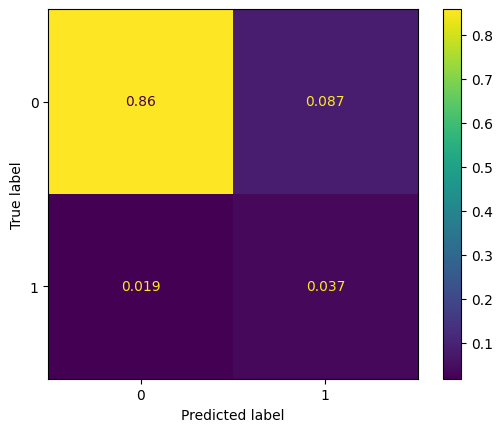

In [1206]:
ConfusionMatrixDisplay.from_estimator(lr_optimo, X1_test,y1_test, normalize='all')

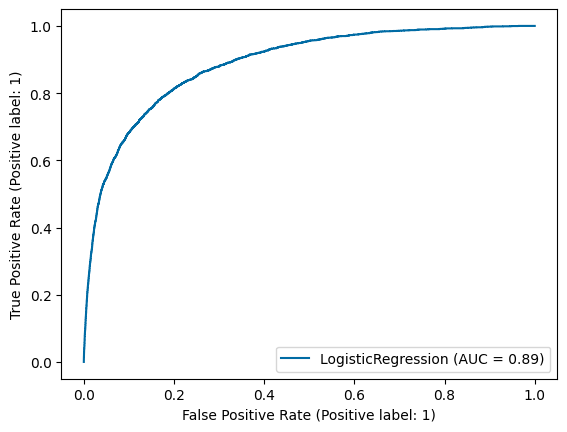

In [1207]:
RocCurveDisplay.from_estimator(lr_optimo, X1_test, y1_test)

###4.2.2 Optimización hiperparámetros Árbol de decisión

In [1208]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_dt= {'max_depth':[3,4,5,6,7,8,9,10,15], 'class_weight':[{0:1,1:1}, {0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

dt = DecisionTreeClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_dt = RandomizedSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_iter=30, random_state=42)

In [1209]:
%%time
rand_search_dt.fit(X2_train, y2_train)

CPU times: user 8min 27s, sys: 7.76 s, total: 8min 34s
Wall time: 8min 57s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=30,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 20},
                                                         {0: 1, 1: 100}],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [1210]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_dt.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.19394525713231012, {'max_depth': 15, 'class_weight': {0: 1, 1: 100}})
(0.3995375198606653, {'max_depth': 7, 'class_weight': {0: 1, 1: 10}})
(0.2815930509772501, {'max_depth': 15, 'class_weight': {0: 1, 1: 20}})
(0.16022391704972933, {'max_depth': 6, 'class_weight': {0: 1, 1: 100}})
(0.37323015062951964, {'max_depth': 10, 'class_weight': {0: 1, 1: 10}})
(0.16388349350148035, {'max_depth': 7, 'class_weight': {0: 1, 1: 100}})
(0.2564614855496608, {'max_depth': 6, 'class_weight': {0: 1, 1: 20}})
(0.42205189559749606, {'max_depth': 6, 'class_weight': {0: 1, 1: 10}})
(0.29846658829874745, {'max_depth': 15, 'class_weight': {0: 1, 1: 1}})
(0.3475818699679376, {'max_depth': 15, 'class_weight': {0: 1, 1: 10}})
(0.45416441654201495, {'max_depth': 3, 'class_weight': {0: 1, 1: 10}})
(0.17075092103854744, {'max_depth': 10, 'class_weight': {0: 1, 1: 100}})
(0.19925977437850545, {'max_depth': 3, 'class_weight': {0: 1, 1: 1}})
(0.29987220376689294, {'max_depth': 7, 'class_weight': {0: 1, 1: 1}})
(0.

Se toman los hiperparámetros óptimos y se genera el modelo de Árbol de Decisión optimizado:

In [1211]:
rand_search_dt.best_params_

{'max_depth': 3, 'class_weight': {0: 1, 1: 10}}

In [1212]:
%%time
dt_optimo= DecisionTreeClassifier(random_state=42,
                          max_depth= rand_search_dt.best_params_['max_depth'],
                          class_weight= rand_search_dt.best_params_['class_weight'])

dt_optimo.fit(X2_train, y2_train)

CPU times: user 1.72 s, sys: 3.09 ms, total: 1.72 s
Wall time: 1.71 s


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=3, random_state=42)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [1213]:
pred_dt_optimo_train = dt_optimo.predict(X2_train)
pred_dt_optimo_test = dt_optimo.predict(X2_test)

In [1214]:
print(classification_report(y2_train,pred_dt_optimo_train))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96    186197
           1       0.38      0.58      0.45     10719

    accuracy                           0.92    196916
   macro avg       0.67      0.76      0.71    196916
weighted avg       0.94      0.92      0.93    196916



In [1215]:
print(classification_report(y2_test,pred_dt_optimo_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     46390
           1       0.38      0.56      0.45      2716

    accuracy                           0.92     49106
   macro avg       0.68      0.75      0.71     49106
weighted avg       0.94      0.92      0.93     49106



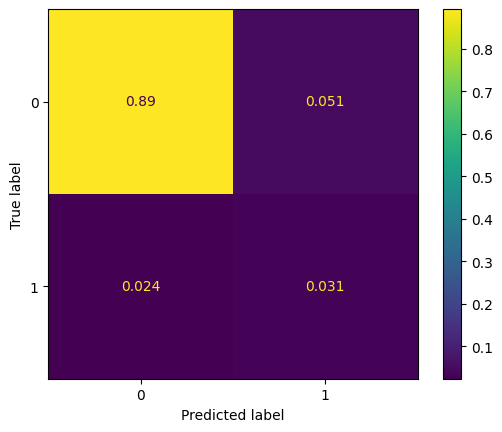

In [1216]:
ConfusionMatrixDisplay.from_estimator(dt_optimo, X2_test,y2_test,normalize='all')

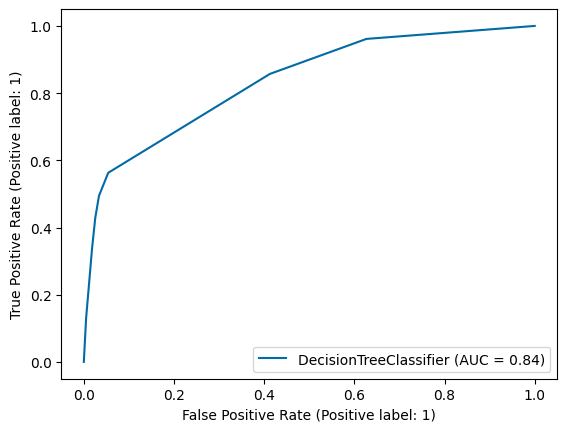

In [1217]:
RocCurveDisplay.from_estimator(dt_optimo, X2_test, y2_test)

###4.2.3 Optimización hiperparámetros Random Forest

In [1218]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_rf= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'n_estimators':[50,100], 'class_weight':[{0:1,1:1}, {0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

rf = RandomForestClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_iter=10, random_state=42)

In [1219]:
%%time
rand_search_rf.fit(X7_train, y7_train)

CPU times: user 24min 24s, sys: 7.99 s, total: 24min 32s
Wall time: 25min 2s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 20},
                                                         {0: 1, 1: 100}],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [1220]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_rf.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.42387681694717916, {'n_estimators': 50, 'max_depth': 8, 'class_weight': {0: 1, 1: 10}})
(0.0, {'n_estimators': 50, 'max_depth': 3, 'class_weight': {0: 1, 1: 1}})
(0.4306791021362752, {'n_estimators': 50, 'max_depth': 4, 'class_weight': {0: 1, 1: 10}})
(0.42393244355059423, {'n_estimators': 100, 'max_depth': 8, 'class_weight': {0: 1, 1: 10}})
(0.27891702994191575, {'n_estimators': 50, 'max_depth': 20, 'class_weight': {0: 1, 1: 1}})
(0.4244996262573067, {'n_estimators': 50, 'max_depth': 7, 'class_weight': {0: 1, 1: 10}})
(0.12110093492541749, {'n_estimators': 50, 'max_depth': 8, 'class_weight': {0: 1, 1: 1}})
(0.14289027133232862, {'n_estimators': 50, 'max_depth': 8, 'class_weight': {0: 1, 1: 100}})
(0.013881171305925172, {'n_estimators': 50, 'max_depth': 5, 'class_weight': {0: 1, 1: 1}})
(0.14272940271999218, {'n_estimators': 50, 'max_depth': 9, 'class_weight': {0: 1, 1: 1}})


Se toman los hiperparámetros óptimos y se genera el modelo de Árbol de decisión optimizado:

In [1221]:
rand_search_rf.best_params_

{'n_estimators': 50, 'max_depth': 4, 'class_weight': {0: 1, 1: 10}}

In [1222]:
%%time
rf_optimo= RandomForestClassifier(random_state=42,
                          max_depth= rand_search_rf.best_params_['max_depth'],
                          n_estimators= rand_search_rf.best_params_['n_estimators'],
                          class_weight= rand_search_rf.best_params_['class_weight'])

rf_optimo.fit(X7_train, y7_train)

CPU times: user 19.4 s, sys: 70.1 ms, total: 19.5 s
Wall time: 19.7 s


RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=4, n_estimators=50,
                       random_state=42)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [1223]:
pred_rf_optimo_train = rf_optimo.predict(X7_train)
pred_rf_optimo_test = rf_optimo.predict(X7_test)

In [1224]:
print(classification_report(y7_train,pred_rf_optimo_train))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95    333547
           1       0.34      0.59      0.43     20106

    accuracy                           0.91    353653
   macro avg       0.66      0.76      0.69    353653
weighted avg       0.94      0.91      0.92    353653



In [1225]:
print(classification_report(y7_test,pred_rf_optimo_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     83412
           1       0.34      0.59      0.43      5002

    accuracy                           0.91     88414
   macro avg       0.66      0.76      0.69     88414
weighted avg       0.94      0.91      0.92     88414



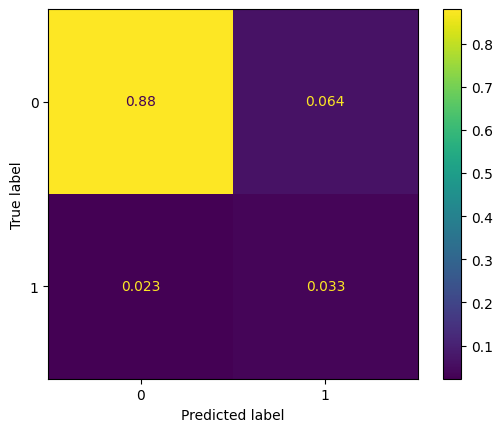

In [1226]:
ConfusionMatrixDisplay.from_estimator(rf_optimo, X7_test,y7_test, normalize='all')

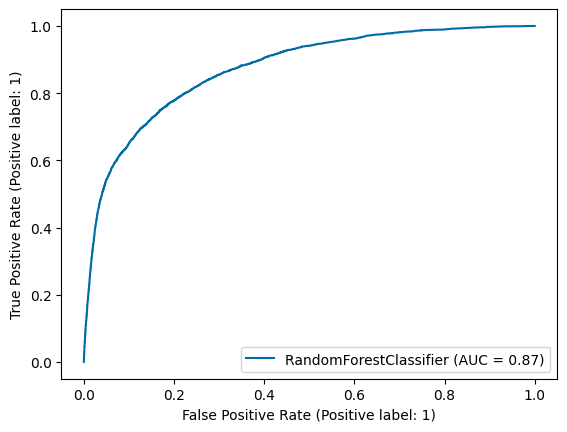

In [1227]:
RocCurveDisplay.from_estimator(rf_optimo, X7_test, y7_test)

###4.2.4 Optimización hiperparámetros XGBoost

In [1228]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

#param_grid_xgb= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'n_estimators ':[50, 80, 100, 120], 'scale_pos_weight':[1,10,20,100]}
param_grid_xgb= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'learning_rate':[0.1, 0.2, 0.5, 1, 10], 'scale_pos_weight':[1,10,20,100]}
xgb = XGBClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_iter=20, random_state=42)

In [1229]:
%%time
rand_search_xgb.fit(X3_train, y3_train)

CPU times: user 24min 1s, sys: 9.39 s, total: 24min 10s
Wall time: 15min 29s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5, 1, 10],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20],
                                        'scale_pos_weight': [1, 10, 20, 100]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [1230]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_xgb.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.22359411598158246, {'scale_pos_weight': 100, 'max_depth': 6, 'learning_rate': 0.5})
(0.18314277162363396, {'scale_pos_weight': 100, 'max_depth': 6, 'learning_rate': 0.1})
(0.3604142423483967, {'scale_pos_weight': 20, 'max_depth': 10, 'learning_rate': 0.1})
(0.3839868613246316, {'scale_pos_weight': 20, 'max_depth': 20, 'learning_rate': 1})
(0.32784376051379616, {'scale_pos_weight': 1, 'max_depth': 5, 'learning_rate': 1})
(0.39840356664586096, {'scale_pos_weight': 100, 'max_depth': 15, 'learning_rate': 0.5})
(0.42566393487342385, {'scale_pos_weight': 10, 'max_depth': 10, 'learning_rate': 0.2})
(0.19948891867586224, {'scale_pos_weight': 20, 'max_depth': 5, 'learning_rate': 10})
(0.20912613892366005, {'scale_pos_weight': 20, 'max_depth': 6, 'learning_rate': 10})
(0.4071198116085566, {'scale_pos_weight': 10, 'max_depth': 4, 'learning_rate': 0.2})
(0.3629259741255992, {'scale_pos_weight': 20, 'max_depth': 9, 'learning_rate': 0.2})
(0.14969607101370672, {'scale_pos_weight': 20, 'max_depth'

Se toman los hiperparámetros óptimos y se genera el modelo de XGBoost optimizado:

In [1231]:
rand_search_xgb.best_params_

{'scale_pos_weight': 10, 'max_depth': 10, 'learning_rate': 0.2}

In [1232]:
%%time
xgb_optimo= XGBClassifier(random_state=42,
                          max_depth= rand_search_xgb.best_params_['max_depth'],
                          learning_rate= rand_search_xgb.best_params_['learning_rate'],
                          scale_pos_weight= rand_search_xgb.best_params_['scale_pos_weight'])

xgb_optimo.fit(X3_train, y3_train)

CPU times: user 16.9 s, sys: 42.7 ms, total: 17 s
Wall time: 10.8 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [1233]:
pred_xgb_optimo_train = xgb_optimo.predict(X3_train)
pred_xgb_optimo_test = xgb_optimo.predict(X3_test)

In [1234]:
print(classification_report(y3_train,pred_xgb_optimo_train))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    186197
           1       0.64      0.94      0.76     10719

    accuracy                           0.97    196916
   macro avg       0.82      0.95      0.87    196916
weighted avg       0.98      0.97      0.97    196916



In [1235]:
print(classification_report(y3_test,pred_xgb_optimo_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     46390
           1       0.37      0.51      0.43      2716

    accuracy                           0.92     49106
   macro avg       0.67      0.73      0.69     49106
weighted avg       0.94      0.92      0.93     49106



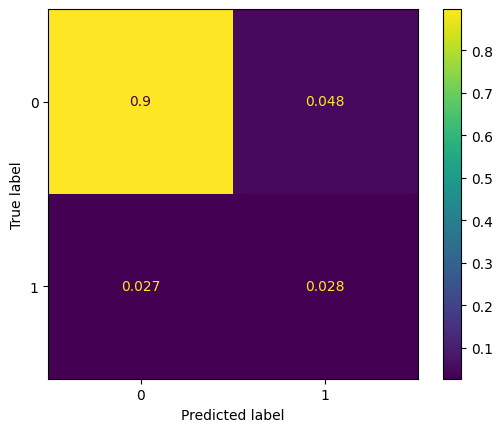

In [1236]:
ConfusionMatrixDisplay.from_estimator(xgb_optimo, X3_test,y3_test, normalize='all')

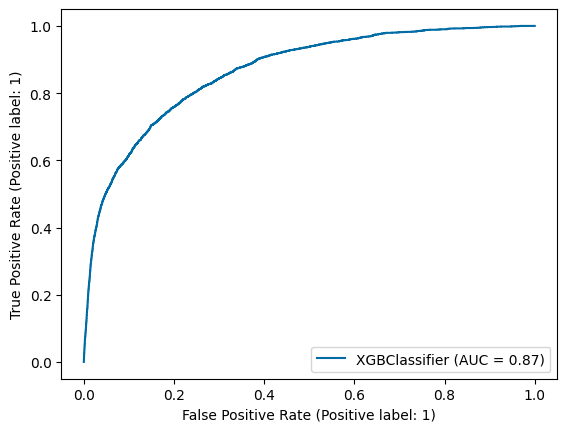

In [1237]:
RocCurveDisplay.from_estimator(xgb_optimo, X3_test, y3_test)

###4.2.5 Optimización hiperparámetros LGBM

In [1238]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_lgbm= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'num_leaves':[21,31,41], 'scale_pos_weight':[1,10,20,100]}

lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_lgbm = RandomizedSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='f1', n_iter=30, random_state=42)

In [1239]:
%%time
rand_search_lgbm.fit(X2_train, y2_train)

CPU times: user 10min 22s, sys: 8.55 s, total: 10min 30s
Wall time: 10min 46s


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
                   n_iter=30,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20],
                                        'num_leaves': [21, 31, 41],
                                        'scale_pos_weight': [1, 10, 20, 100]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [1240]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_lgbm.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.3303412575633595, {'scale_pos_weight': 1, 'num_leaves': 41, 'max_depth': 6})
(0.17956234328995938, {'scale_pos_weight': 100, 'num_leaves': 41, 'max_depth': 6})
(0.33812259296735914, {'scale_pos_weight': 1, 'num_leaves': 31, 'max_depth': 3})
(0.1825619124141411, {'scale_pos_weight': 100, 'num_leaves': 31, 'max_depth': 7})
(0.30544110940737335, {'scale_pos_weight': 20, 'num_leaves': 21, 'max_depth': 5})
(0.3312653473142187, {'scale_pos_weight': 1, 'num_leaves': 31, 'max_depth': 8})
(0.4003297832726919, {'scale_pos_weight': 10, 'num_leaves': 21, 'max_depth': 9})
(0.3051819124497043, {'scale_pos_weight': 20, 'num_leaves': 41, 'max_depth': 3})
(0.3326577804646369, {'scale_pos_weight': 1, 'num_leaves': 31, 'max_depth': 6})
(0.19282656176294843, {'scale_pos_weight': 100, 'num_leaves': 41, 'max_depth': 15})
(0.3034892936489003, {'scale_pos_weight': 20, 'num_leaves': 31, 'max_depth': 4})
(0.30479184748968746, {'scale_pos_weight': 20, 'num_leaves': 21, 'max_depth': 8})
(0.16488690425853011, {

Se toman los hiperparámetros óptimos y se genera el modelo de LGBM optimizado:

In [1241]:
rand_search_lgbm.best_params_

{'scale_pos_weight': 10, 'num_leaves': 41, 'max_depth': 6}

In [1242]:
%%time
lgbm_optimo= LGBMClassifier(random_state=42,
                          max_depth= rand_search_lgbm.best_params_['max_depth'],
                          num_leaves= rand_search_lgbm.best_params_['num_leaves'],
                          scale_pos_weight= rand_search_lgbm.best_params_['scale_pos_weight'],
                          verbose=-1)

lgbm_optimo.fit(X2_train, y2_train)

CPU times: user 5.79 s, sys: 16.6 ms, total: 5.8 s
Wall time: 5.93 s


LGBMClassifier(max_depth=6, num_leaves=41, random_state=42, scale_pos_weight=10,
               verbose=-1)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [1243]:
pred_lgbm_optimo_train = lgbm_optimo.predict(X2_train)
pred_lgbm_optimo_test = lgbm_optimo.predict(X2_test)

In [1244]:
print(classification_report(y2_train,pred_lgbm_optimo_train))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95    186197
           1       0.32      0.72      0.44     10719

    accuracy                           0.90    196916
   macro avg       0.65      0.82      0.69    196916
weighted avg       0.95      0.90      0.92    196916



In [1245]:
print(classification_report(y2_test,pred_lgbm_optimo_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     46390
           1       0.29      0.66      0.41      2716

    accuracy                           0.89     49106
   macro avg       0.64      0.78      0.67     49106
weighted avg       0.94      0.89      0.91     49106



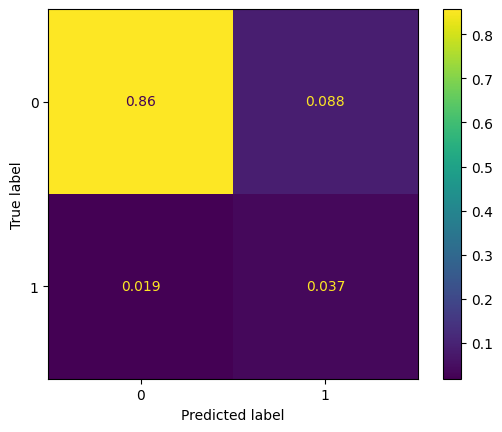

In [1246]:
ConfusionMatrixDisplay.from_estimator(lgbm_optimo, X2_test,y2_test, normalize='all')

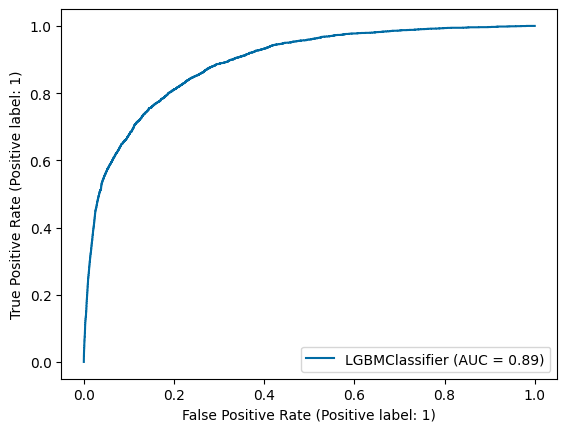

In [1247]:
RocCurveDisplay.from_estimator(lgbm_optimo, X2_test, y2_test)

#4.3 Elección del modelo final

Una vez finalizado el entrenamiento de los modelos con diversos valores de hiperparámetros, se resumen en una tabla diversas métricas para evaluar el rendimiento en los datos de prueba:

In [1249]:
datos= {'Accuracy': [accuracy_score(y1_test,pred_lr_optimo_test),
                     accuracy_score(y2_test,pred_dt_optimo_test),
                     accuracy_score(y7_test,pred_rf_optimo_test),
                     accuracy_score(y3_test,pred_xgb_optimo_test),
                     accuracy_score(y2_test,pred_lgbm_optimo_test)],

        'Recall': [recall_score(y1_test,pred_lr_optimo_test),
                   recall_score(y2_test,pred_dt_optimo_test),
                   recall_score(y7_test,pred_rf_optimo_test),
                   recall_score(y3_test,pred_xgb_optimo_test),
                   recall_score(y2_test,pred_lgbm_optimo_test)],

        'Precision': [precision_score(y1_test,pred_lr_optimo_test),
                      precision_score(y2_test,pred_dt_optimo_test),
                      precision_score(y7_test,pred_rf_optimo_test),
                      precision_score(y3_test,pred_xgb_optimo_test),
                      precision_score(y2_test,pred_lgbm_optimo_test)],

        'F1': [f1_score(y1_test,pred_lr_optimo_test),
               f1_score(y2_test,pred_dt_optimo_test),
               f1_score(y7_test,pred_rf_optimo_test),
               f1_score(y3_test,pred_xgb_optimo_test),
               f1_score(y2_test,pred_lgbm_optimo_test)],

        'ROC_AUC': [roc_auc_score(y1_test,pred_lr_optimo_test),
               roc_auc_score(y2_test,pred_dt_optimo_test),
               roc_auc_score(y7_test,pred_rf_optimo_test),
               roc_auc_score(y3_test,pred_xgb_optimo_test),
               roc_auc_score(y2_test,pred_lgbm_optimo_test)],

        'AUC gráfico':[0.89, 0.84, 0.87, 0.87, 0.89],
        'CV training (s)':[618, 537, 1502, 929, 646],
        'N_iter': [15, 30, 10, 20, 30],
        'Training (s)': [6.55, 1.71, 19.7, 10.8 , 5.93]
        }

In [1250]:
pd.DataFrame(datos, index=['Regresión Logística','Árbol de decisión','Random Forest', 'XGBoost','LightGBM'])

,Accuracy,Recall,Precision,F1,ROC_AUC,AUC gráfico,CV training (s),N_iter,Training (s)
Regresión Logística,0.894575,0.664580,0.297315,0.410834,0.786310,0.89,618,15,6.55
Árbol de decisión,0.924673,0.562960,0.378372,0.452568,0.754405,0.84,537,30,1.71
Random Forest,0.913170,0.590164,0.344096,0.434725,0.761352,0.87,1502,10,19.70
XGBoost,0.924592,0.508100,0.368295,0.427046,0.728538,0.87,929,20,10.80
LightGBM,0.893598,0.660898,0.294311,0.407260,0.784060,0.89,646,30,5.93


Debido a que este en este problema los datos del target se encuentran desbalanceados, el Accuracy no es una métrica tan fiable, por lo que se tiene en consideración otras métricas como el F1-score, ya que se busca un balance entre el Recall y el Precision

A raíz de los resultados, se elige como modelo final un Árbol de Decisión, toda vez que tiene el mejor F1-score (0.45). Si bien, de entre todos los modelos, no tiene el  Recall más alto (0.56), tiene el mejor valor de Precision (0.37). Ambas métricas se encuentran relativamente balanceados, a diferencia del resto de los modelos que tienden a tener una de ellas elevada en desmedro de su respectiva segunda métrica (con un valor mucho más bajo).

Puesto que previamente se realizó una búsqueda aleatoria, ahora de efectúa una búsqueda más exhaustiva de los hiperparámetros del modelo para intentar mejorar las métricas ya obtenidas:

#4.4 Optimización con búsqueda exhaustiva (Árbol de decisión)

Teniendo en consideración los hiperparámetros ya utilizados para escoger el modelo de árbol de decisión, se volverá a optimizar el modelo buscando mejorar las métricas ya que en su momento el tiempo de pruebas se distribuyó en todos los modelos en estudio. Ahora se probarán algunos hiperparámetros con valores cercanos al mejor modelo obtenido mediante una búsqueda exhaustiva:

In [1251]:
from sklearn.model_selection import GridSearchCV

In [1252]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_final= {'max_depth':[5,6,7,8,9], 'class_weight':[{0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

dt = DecisionTreeClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
grid_search_dt = GridSearchCV(dt, param_grid_final, cv=5, scoring='f1')

In [1253]:
%%time
grid_search_dt.fit(X2_train, y2_train)

CPU times: user 4min 17s, sys: 3.67 s, total: 4min 21s
Wall time: 4min 38s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 20},
                                          {0: 1, 1: 100}],
                         'max_depth': [5, 6, 7, 8, 9]},
             scoring='f1')

Se imprimen los puntajes obtenidos con Grid Search:

In [1254]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = grid_search_dt.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.4514848116345157, {'class_weight': {0: 1, 1: 10}, 'max_depth': 5})
(0.42205189559749606, {'class_weight': {0: 1, 1: 10}, 'max_depth': 6})
(0.3995375198606653, {'class_weight': {0: 1, 1: 10}, 'max_depth': 7})
(0.38272311817306354, {'class_weight': {0: 1, 1: 10}, 'max_depth': 8})
(0.3930624864908424, {'class_weight': {0: 1, 1: 10}, 'max_depth': 9})
(0.2708619277742945, {'class_weight': {0: 1, 1: 20}, 'max_depth': 5})
(0.2564614855496608, {'class_weight': {0: 1, 1: 20}, 'max_depth': 6})
(0.28537448228711215, {'class_weight': {0: 1, 1: 20}, 'max_depth': 7})
(0.27680996343710523, {'class_weight': {0: 1, 1: 20}, 'max_depth': 8})
(0.2801916575937665, {'class_weight': {0: 1, 1: 20}, 'max_depth': 9})
(0.16330875560715688, {'class_weight': {0: 1, 1: 100}, 'max_depth': 5})
(0.16022391704972933, {'class_weight': {0: 1, 1: 100}, 'max_depth': 6})
(0.16388349350148035, {'class_weight': {0: 1, 1: 100}, 'max_depth': 7})
(0.1643513980537647, {'class_weight': {0: 1, 1: 100}, 'max_depth': 8})
(0.169606

Se obtienen\ los hiperparámetros óptimos y se genera el modelo de Árbol de Decisión optimizado:

In [1255]:
grid_search_dt.best_params_

{'class_weight': {0: 1, 1: 10}, 'max_depth': 5}

In [1256]:
%%time
dt_optimo_final= DecisionTreeClassifier(random_state=42,
                          max_depth= grid_search_dt.best_params_['max_depth'],
                          class_weight= grid_search_dt.best_params_['class_weight'])

dt_optimo_final.fit(X2_train, y2_train)

CPU times: user 3.12 s, sys: 2.89 ms, total: 3.12 s
Wall time: 3.15 s


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=5, random_state=42)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [1257]:
pred_dt_optimo_train_final = dt_optimo_final.predict(X2_train)
pred_dt_optimo_test_final = dt_optimo_final.predict(X2_test)

In [1258]:
print(classification_report(y2_train,pred_dt_optimo_train_final))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    186197
           1       0.37      0.58      0.45     10719

    accuracy                           0.92    196916
   macro avg       0.67      0.76      0.71    196916
weighted avg       0.94      0.92      0.93    196916



In [1259]:
print(classification_report(y2_test,pred_dt_optimo_test_final))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     46390
           1       0.38      0.57      0.45      2716

    accuracy                           0.92     49106
   macro avg       0.68      0.76      0.71     49106
weighted avg       0.94      0.92      0.93     49106



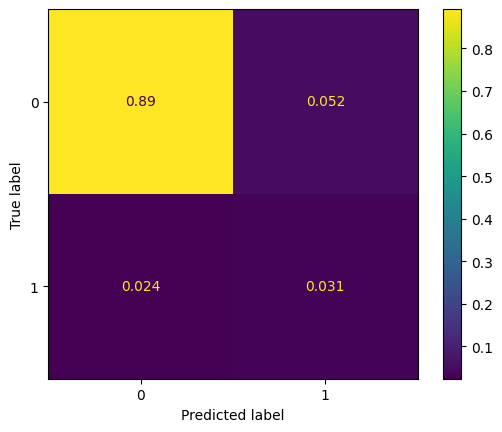

In [1260]:
ConfusionMatrixDisplay.from_estimator(dt_optimo_final, X2_test,y2_test,normalize='all')

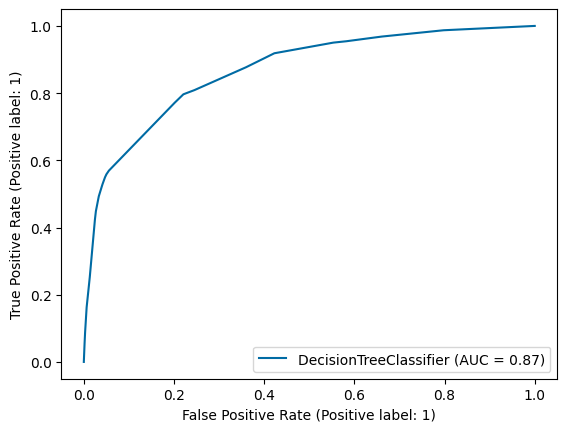

In [1261]:
RocCurveDisplay.from_estimator(dt_optimo_final, X2_test, y2_test)

Se evidencia que la búsqueda exhaustiva mejoró levemente el Recall, manteniendo prácticamente el mismo valor del F1-score y el Precision obtenidos con anterioridad. Este ligero incremento del Recall (0.56 a 0.57) ayuda a mejorar la clasificación de la clase de interés. Por otra parte, también subió el valor del área bajo la curva ROC de 0.84 a 0.87.

Finalmente, se grafica el árbol de decisión con la mejor configuración obtenida durante el proceso de optimización:

In [1262]:
# Referencia https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
from sklearn.tree import plot_tree

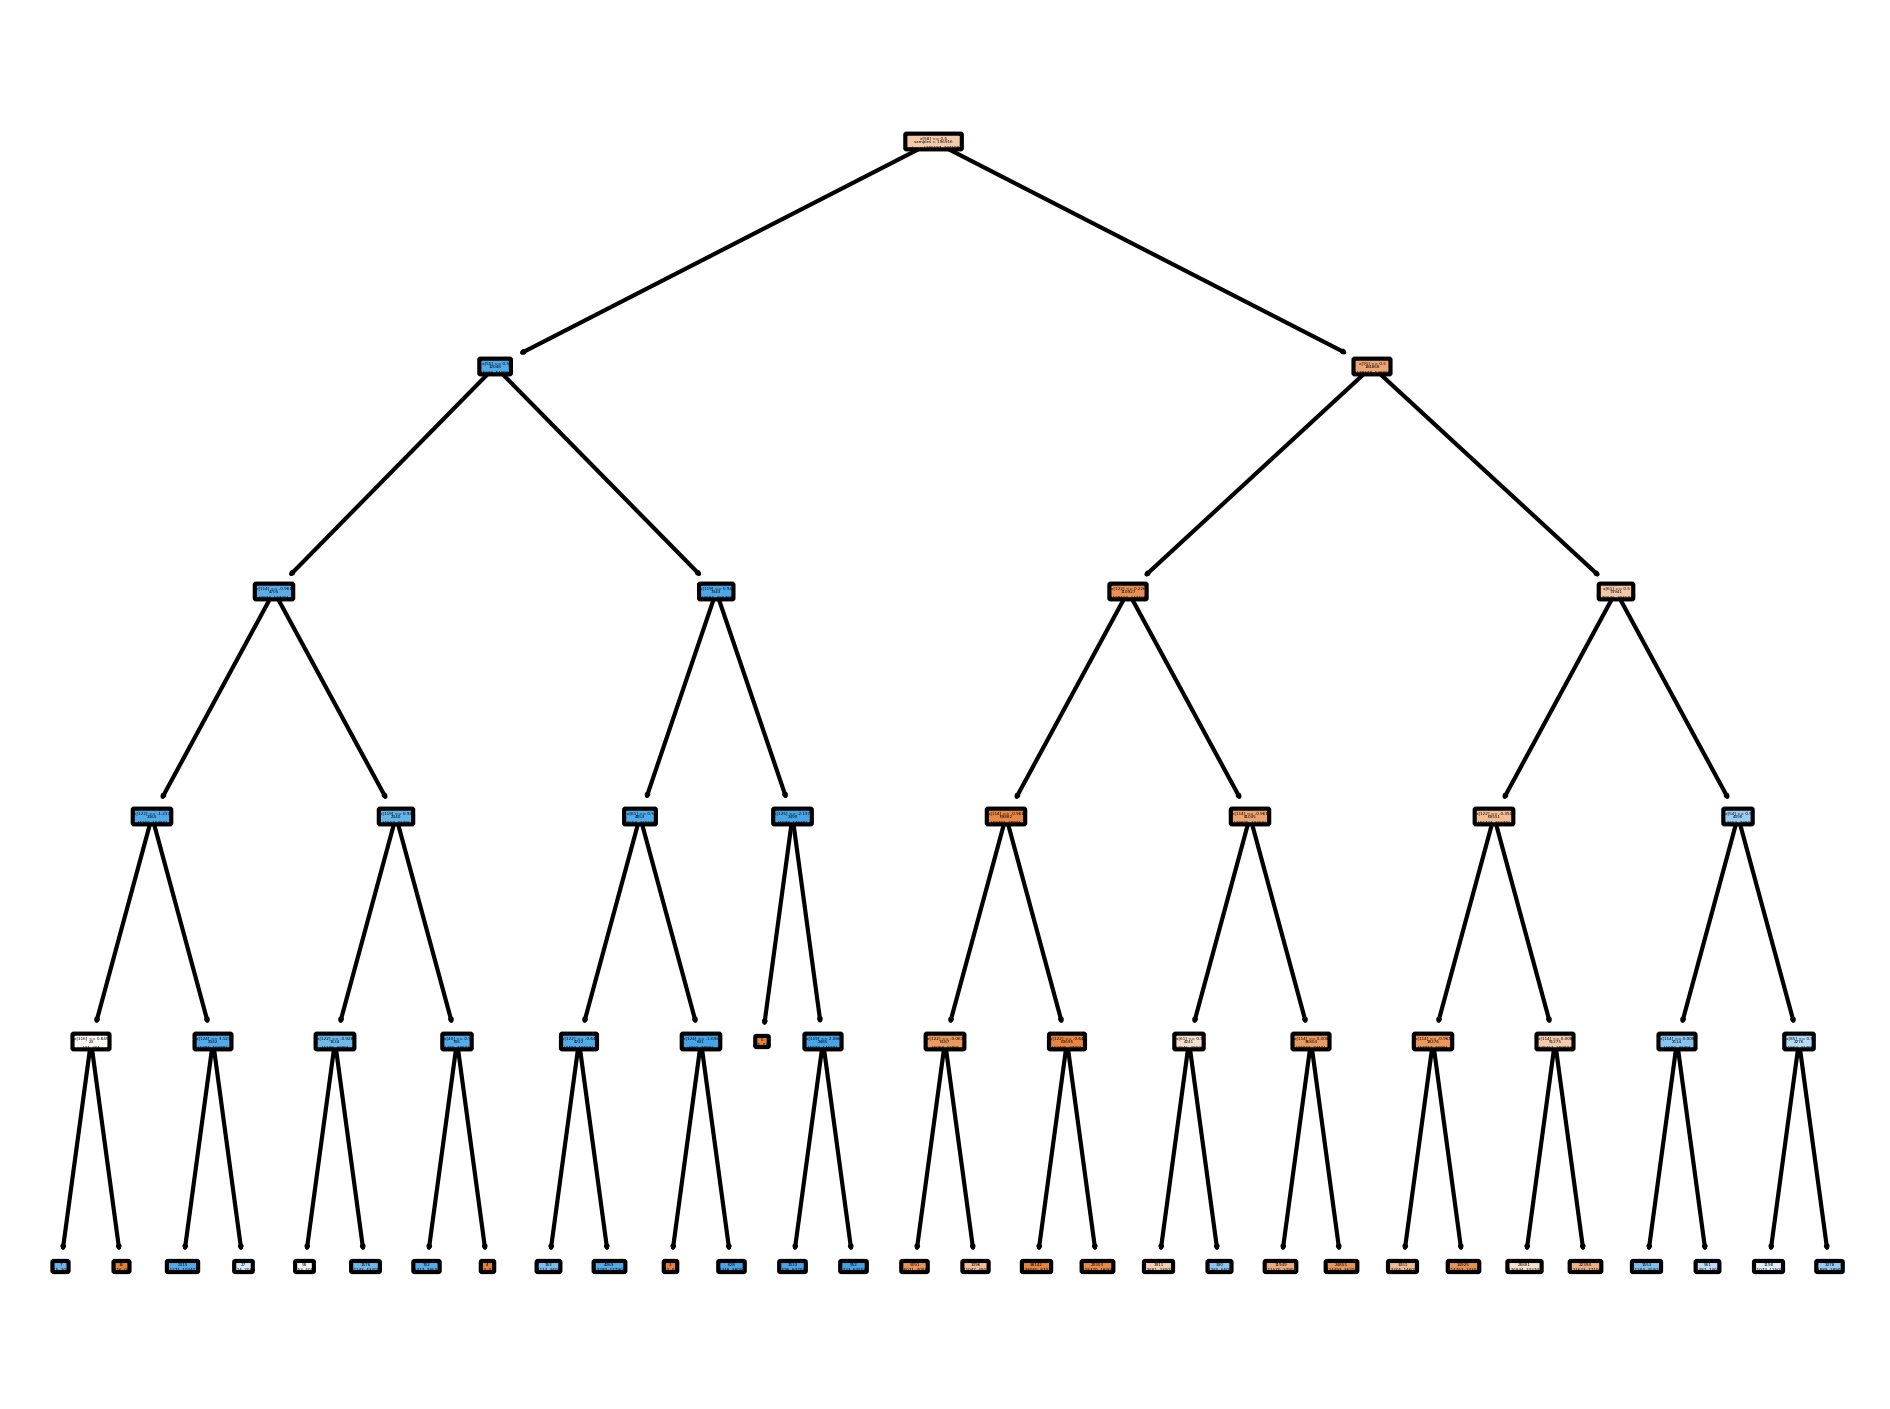

In [1263]:
plt.figure(dpi=300)
plot_tree(dt_optimo_final, label='root', rounded=True, filled=True, impurity=False)
plt.tight_layout()
plt.savefig('DecisionTreeOptimo.png')